<a href="https://colab.research.google.com/github/annitaannita/RevoU-Projects/blob/main/W6W7W8_Annita_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intermediate Assignment**
W6W7W8 - Python for Data Analysis

*by Annita*

RevoU - FSDA - Section Madrid - Team 5

# Overview Problem

<p align = "justify"> An e-commerce startup based in Brazil recently opened an online website to sell their product. They launch the website when the covid-19 hits and making them grow faster than ever. But, the startup is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. The goal is to increase their marketing conversion rate by doing customer segmentation analysis to understand the customer's behaviour and planning targeted marketing strategy so that it will not hurt the budget anymore. </p>

# Objectives

- Give insights from the datasets for better understanding their current business performance.

- Create customer segmentation using cluster analysis in order to help the e-commerce to understand their customer better and plan a suitable marketing strategy for business.

# Questions

**There are several questions that need to be answered in this project:**

1. How long does it take from purchase time to carrier and from carrier to customer?
2. Is there any sales trend based on number of orders?
2. How is the total sales in each month?
3. How is Average Order Value in each month?
3. Which day of the week is the busiest?
4. What is the most favourite payment type?
5. Where are the customers coming from?

7. Which state contributes the most to total sales in Jan 2018 - Aug 2018?
8. What time does customer usually do purchase in the e-commerce?
10. Which state has the lowest Average Revenue Per Customer in Jan 2018 - Aug 2018?

# Data Preparation

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from datetime import timedelta

## Import Datasets

The datasets are originally from Kaggle :
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

But in this project, only three datasets will be used, there are orders_dataset, customers_dataset, and order_payments_dataset.

1.   orders_dataset

In [ ]:
url_orders = 'https://docs.google.com/spreadsheets/d/1Xox8rC23pGkxZ3PBx2HpdC-oNh01u-RpUt12UisbZ24/edit#gid=1118415987'
url_orders_trf = url_orders.replace('/edit#gid=', '/export?format=csv&gid=')
df_orders = pd.read_csv(url_orders_trf)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


2.  customers_dataset

In [ ]:
url_customers = 'https://docs.google.com/spreadsheets/d/1loMwIe39SrqnSU-IRSQzeTONuMaTSMUKcolrejWmXpc/edit#gid=874094636'
url_customers_trf = url_customers.replace('/edit#gid=', '/export?format=csv&gid=')
df_customers = pd.read_csv(url_customers_trf)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


3.  order_payments_dataset

In [ ]:
url_payments = 'https://docs.google.com/spreadsheets/d/1ls-lRjewwr_JFrauE3tnux2mxqJ3wG4zopg0Okxl2CM/edit#gid=1628492463'
url_payments_trf = url_payments.replace('/edit#gid=', '/export?format=csv&gid=')
df_payments = pd.read_csv(url_payments_trf)
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04


## Cleaning Orders_Dataset

In [ ]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


### Drop Unused Columns and Rows

From orders_dataset, 'order_approved_at' will be dropped. 

In [ ]:
# make a copy of dataframe 
dfdrop_orders = df_orders.copy() 

In [ ]:
# remove unused column
dfdrop_orders.drop(columns=['order_approved_at'], inplace = True)
dfdrop_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


### Handling Unlogical Value

<p align = 'justify'> Logically, order_purchase_timestamp should be done first by the customer, followed by the e-commerce hands the product to carrier, and finally the carrier will hand the product to the customer. Which means, order_purchase_timestamp < order_delivered_carrier_date < order_delivered_customer_date. So, I'll check it.</p>


In [ ]:
# checking data type
dftype_orders = dfdrop_orders.copy()
dftype_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [ ]:
# change order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date and order_estimated_delivery_date columns to timestamp
dftype_orders[dftype_orders.columns[3:]] = dftype_orders[dftype_orders.columns[3:]].apply(pd.to_datetime)
dftype_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 5   order_delivered_customer_date  96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [ ]:
# copy the DataFrame
dfunlog_orders = dftype_orders.copy()
dfunlog_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
# check if there's any data with order_purchase_timestamp > order_delivered_carrier_date
dfunlog_orders[dfunlog_orders['order_purchase_timestamp']>dfunlog_orders['order_delivered_carrier_date']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,2018-08-16 13:27:00,2018-08-24 14:58:37,2018-09-04
1111,ad133696906f6a78826daa0911b7daec,e6f5b234bb0d847f10eebd70130c5d49,delivered,2018-06-15 15:41:22,2018-06-15 14:52:00,2018-06-22 18:09:37,2018-07-18
1329,74e033208dc13a7b8127eb8e73d09b76,72fcbb1145f2889eddcba6d6c1d6c090,delivered,2018-05-02 10:48:44,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29
1372,a6b58794fd2ba533359a76c08df576e3,ccd8e3459ad58ae538c9d2cf35532ba4,delivered,2018-05-14 15:18:23,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08
1864,5792e0b1c8c8a2bf53af468c9a422c88,5c427f06e7fcf902e309743516e2c580,delivered,2018-07-26 13:25:14,2018-07-26 12:42:00,2018-07-30 14:45:02,2018-08-09
...,...,...,...,...,...,...,...
98172,f7780ea2807db31691e83f0013294035,3088cc4bfafe311f1d84830808c2aa6d,delivered,2018-07-30 15:22:15,2018-07-30 15:00:00,2018-08-02 18:32:30,2018-08-02
98430,d7646ffe8fdd9e7d9557f9f7cbf04530,f896e70d84f6db9a56b86a47dd8718f0,delivered,2018-05-04 14:50:37,2018-05-04 14:48:00,2018-05-08 19:06:42,2018-05-16
98672,5ded8a3706eabd813685534724f066de,460316e38d4d241fc79d4f6729f8f7f6,delivered,2018-07-18 08:46:52,2018-07-18 08:44:00,2018-07-25 13:53:17,2018-08-10
98780,d10046876c7d9f01613da59ffa6cb07f,6559cb5b365f173915f766fefcd86972,delivered,2018-07-18 16:14:16,2018-07-18 15:34:00,2018-07-23 20:46:44,2018-08-07


In [ ]:
# drop the unlogical data
dfunlog_orders.drop(dfunlog_orders[dfunlog_orders['order_purchase_timestamp']>dfunlog_orders['order_delivered_carrier_date']].index, inplace = True)
dfunlog_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
# Now, check if there's any data with order_delivered_carrier_date > order_delivered_customer_date
dfunlog_orders[dfunlog_orders['order_delivered_carrier_date']>dfunlog_orders['order_delivered_customer_date']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31
21338,8c78d01de3a9009e23d6877a7cc9be20,6cd7106899e59a1fbd0622d5f1efedf4,delivered,2016-10-08 15:36:50,2016-10-26 11:41:53,2016-10-25 17:51:46,2016-11-30
22520,b27af682321527a6349f1761eb3f360c,9859dd92e872dbaa60ca3cd5f0d7ad07,delivered,2017-06-14 20:17:04,2017-06-27 14:51:54,2017-06-26 15:45:35,2017-07-14
25393,1cc3ae63caffff2d6c3ee3e78e074acf,01c843a2c0600def0b7693dba47af460,delivered,2017-08-07 21:35:22,2017-08-10 18:28:56,2017-08-10 18:05:38,2017-08-25
25646,e37f11cae9985ca58f0b56f268720537,3947a361301f2ff0f3223159a0f2701c,delivered,2017-07-26 11:46:34,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18


In [ ]:
# drop the unlogical data
dfunlog_orders.drop(dfunlog_orders[dfunlog_orders['order_delivered_carrier_date']>dfunlog_orders['order_delivered_customer_date']].index, inplace = True)
dfunlog_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
# Now, check if there's any data with order_purchase_timestamp > order_delivered_customer_date 
dfunlog_orders[dfunlog_orders['order_purchase_timestamp']>dfunlog_orders['order_delivered_customer_date']]
# There are no unlogical data for this condition.

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### Handling Missing Value

In [ ]:
dfmiss_orders = dfunlog_orders.copy()

In [ ]:
dfmiss_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1783
order_delivered_customer_date    2964
order_estimated_delivery_date       0
dtype: int64

I need to check the order_status and order_delivered_customer_date.



In [ ]:
dfmiss_orders['order_status'].value_counts()

delivered      96290
shipped         1106
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

If the order_status = delivered, and order_delivered_customer_date = NULL, then i'll remove it. For the rest of order_status, i'll replace it with "Unknown".

In [ ]:
# checking order_status = delivered and order_delivered_customer_date = NULL
dfmiss_orders[dfmiss_orders['order_status']=='delivered'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     2
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

In [ ]:
dfmiss_orders[(dfmiss_orders['order_status']=='delivered') & (dfmiss_orders['order_delivered_customer_date'].isna()==True)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-07-03 19:26:00,NaT,2018-07-19


In [ ]:
# remove row with order_status = delivered and order_delivered_customer_date = NULL
dfmiss_orders.drop(dfmiss_orders[(dfmiss_orders['order_status']=='delivered') & (dfmiss_orders['order_delivered_customer_date'].isna()==True)].index, inplace = True) 

In [ ]:
# checking order_status = delivered and order_delivered_customer_date = NULL
# notice that order_status = delivered and order_delivered_carrier_date = NULL has 1 row. I decided to remove it.
dfmiss_orders[dfmiss_orders['order_status']=='delivered'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
# remove row with order_status = delivered and order_delivered_carrier_date = NULL
dfmiss_orders.drop(dfmiss_orders[(dfmiss_orders['order_status']=='delivered') & (dfmiss_orders['order_delivered_carrier_date'].isna()==True)].index, inplace = True) 
# check again
dfmiss_orders[dfmiss_orders['order_status']=='delivered'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
# For the rest of order_status, i'll replace it with "Unknown".
dfmiss_orders[~(dfmiss_orders['order_status']=='delivered') & (dfmiss_orders['order_delivered_customer_date'].isna()==True)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,NaT,2017-09-15


In [ ]:
# replace it with 'Unknown'
dfmiss_orders.loc[dfmiss_orders['order_delivered_customer_date'].isna()==True, 'order_delivered_customer_date'] = "Unknown"

In [ ]:
# check again
dfmiss_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1781
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

Now, for order_delivered_carrier_date, I'll check the order_status again.

In [ ]:
dfmiss_orders[dfmiss_orders['order_delivered_carrier_date'].isna()==True]['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: order_status, dtype: int64

I decided to replace all of them with "Unknown"

In [ ]:
# replace it with 'Unknown'
dfmiss_orders.loc[dfmiss_orders['order_delivered_carrier_date'].isna()==True, 'order_delivered_carrier_date'] = "Unknown"
# check again
dfmiss_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
dfmiss_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


### Check Duplicates, Data Types, and Typos

In [ ]:
dfdup_orders = dfmiss_orders.copy()

In [ ]:
dfdup_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
dfdup_orders.duplicated().sum()

0

In [ ]:
dfdup_orders['order_id'].duplicated().sum()

0

No duplicate value. Now, let's check the data types again.

In [ ]:
dftypeagain_orders = dfdup_orders.copy()

In [ ]:
dftypeagain_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99243 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99243 non-null  object        
 1   customer_id                    99243 non-null  object        
 2   order_status                   99243 non-null  object        
 3   order_purchase_timestamp       99243 non-null  datetime64[ns]
 4   order_delivered_carrier_date   99243 non-null  object        
 5   order_delivered_customer_date  99243 non-null  object        
 6   order_estimated_delivery_date  99243 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 6.1+ MB


The order_delivered_carrier_date and order_delivered_customer_date columns will be left with 'object' data type, since they have 'Unknown' value. 

In [ ]:
dftypeagain_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
# Orders DataFrame ready to be used.
dfclean_orders = dftypeagain_orders.copy()
dfclean_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Cleaning Customers_Dataset

In [ ]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Drop Unused Columns

From customers_dataset, 'customer_zip_code_prefix' will be dropped. 

In [ ]:
# make a copy of dataframe 
dfdrop_customers = df_customers.copy() 

In [ ]:
dfdrop_customers.drop(columns=['customer_zip_code_prefix'], inplace = True)
dfdrop_customers

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS


### Handling Missing Value

In [ ]:
dfmiss_customers = dfdrop_customers.copy()

In [ ]:
dfmiss_customers.isna().sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

No missing value.

### Check Duplicates, Data Types, and Typos

In [ ]:
dfdup_customers = dfmiss_customers.copy()

In [ ]:
dfdup_customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [ ]:
dfdup_customers.duplicated().sum()

0

In [ ]:
dfdup_customers['customer_id'].duplicated().sum()

0

In [ ]:
dfdup_customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

No duplicate value. Now let's check the data types

In [ ]:
dftype_customers = dfdup_customers.copy()

In [ ]:
dftype_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [ ]:
dfclean_customers = dftype_customers.copy()
dfclean_customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


## Cleaning Order_Payments_Dataset

In [ ]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
103882,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
103883,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
103884,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


### Handling Missing Value

In [ ]:
dfmiss_payments = df_payments.copy()

In [ ]:
dfmiss_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

No missing value.

### Check Duplicates, Data Types, and Typos

In [ ]:
dfdup_payments = dfmiss_payments.copy()

In [ ]:
dfdup_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04


In [ ]:
dfdup_payments.duplicated().sum()

0

In [ ]:
dfdup_payments['order_id'].duplicated().sum()

4446

There are 4446 duplicate values in order_id column. This may indicating an order is paid by two or more methods. So I decided to keep it.

Now, let's check the data type for each columns.

In [ ]:
dftype_payments = dfdup_payments.copy()

In [ ]:
dftype_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Change payment_sequential and payment_installments become categorical variable.

In [ ]:
dftype_payments['payment_sequential'] = dftype_payments['payment_sequential'].astype(str)
dftype_payments['payment_installments'] = dftype_payments['payment_installments'].astype(str)

In [ ]:
dftype_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


Also, check if there's any typos.

In [ ]:
dftype_payments['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
17        6
16        6
18        6
19        6
21        4
20        4
22        3
26        2
25        2
24        2
23        2
27        1
29        1
28        1
Name: payment_sequential, dtype: int64

In [ ]:
dftype_payments['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [ ]:
dftype_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Since the not_defined payment_type only has 3 rows, then i decided to remove them.

In [ ]:
dftype_payments.drop(dftype_payments[dftype_payments['payment_type'] == 'not_defined'].index, inplace = True)
dftype_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
103882,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
103883,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
103884,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


In [ ]:
dftype_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [ ]:
# For order_payments dataset, I decided to merge all dataset first, and then check the outliers for payment value.
dftemp_payments = dftype_payments.copy()
dftemp_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
103882,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
103883,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
103884,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


## Merged The Datasets

In [ ]:
dfclean_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
dfclean_customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [ ]:
# Merge orders and customer DataFrame first, by using customer_id and 'inner' join method
df1merge = pd.merge(dfclean_orders, dfclean_customers, on='customer_id', how='inner')
df1merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...
99238,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
99239,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,praia grande,SP
99240,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
99241,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


In [ ]:
# Next, I merge df1merge with dftemp_payments, by using order_id and 'left' join method
df2merge = pd.merge(dftemp_payments, df1merge, on ='order_id', how='left')
df2merge

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103879,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,curitiba,PR
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Checking missing values
df2merge.isna().sum()

order_id                           0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                      203
order_status                     203
order_purchase_timestamp         203
order_delivered_carrier_date     203
order_delivered_customer_date    203
order_estimated_delivery_date    203
customer_unique_id               203
customer_city                    203
customer_state                   203
dtype: int64

In [ ]:
# Drop row with missing values
df2merge.dropna(inplace = True)

In [ ]:
# Checking missing values again
df2merge.isna().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
dtype: int64

### Handling Outliers

In [ ]:
dfout = df2merge.copy()
dfout

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103879,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,curitiba,PR
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


I'll check if there's any outliers in payment_value column. So I decided to take order_id and payment_value first, and sum the payment_value with same order_id.

In [ ]:
df_sum = pd.DataFrame(dfout.groupby('order_id')['payment_value'].agg('sum')).reset_index()
df_sum.rename(columns={'payment_value':'amount_order'},inplace = True)
df_sum

,order_id,amount_order
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99234,fffc94f6ce00a00581880bf54a75a037,343.40
99235,fffcd46ef2263f404302a634eb57f7eb,386.53
99236,fffce4705a9662cd70adb13d4a31832d,116.85
99237,fffe18544ffabc95dfada21779c9644f,64.71


In [ ]:
# Define lower inner bound & upper inner bound
q1_value = df_sum['amount_order'].quantile(.25)
q3_value = df_sum['amount_order'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Inner Bound and Upper Inner Bound
LIB_value = q1_value - (1.5*iqr_value)
UIB_value = q3_value + (1.5*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LIB = ',LIB_value)
print('UIB = ',UIB_value)

Q1 =  62.0
Q3 =  176.965
IQR =  114.965
LIB =  -110.44749999999999
UIB =  349.4125


In [ ]:
# This DataFrame contains order_id that already clean from outliers.
dfclear = df_sum[(df_sum['amount_order']>=LIB_value)&(df_sum['amount_order']<=UIB_value)]
dfclear

,order_id,amount_order
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99233,fffbee3b5462987e66fb49b1c5411df2,139.88
99234,fffc94f6ce00a00581880bf54a75a037,343.40
99236,fffce4705a9662cd70adb13d4a31832d,116.85
99237,fffe18544ffabc95dfada21779c9644f,64.71


In [ ]:
# Now call all the data in df2merge with the same order_id in dfclear (for filter order_id without outliers data)
a = dfclear['order_id'].tolist()
df = df2merge[df2merge['order_id'].isin(a)]
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,1,credit_card,3,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
print('Before removing outliers, there are {} rows data.' .format(len(dfout)))
print('After removing outliers, there are {} rows data.' .format(len(df)))

Before removing outliers, there are 103680 rows data.
After removing outliers, there are 95426 rows data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95426 entries, 0 to 103882
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95426 non-null  object        
 1   payment_sequential             95426 non-null  object        
 2   payment_type                   95426 non-null  object        
 3   payment_installments           95426 non-null  object        
 4   payment_value                  95426 non-null  float64       
 5   customer_id                    95426 non-null  object        
 6   order_status                   95426 non-null  object        
 7   order_purchase_timestamp       95426 non-null  datetime64[ns]
 8   order_delivered_carrier_date   95426 non-null  object        
 9   order_delivered_customer_date  95426 non-null  object        
 10  order_estimated_delivery_date  95426 non-null  datetime64[ns]
 11  customer_uniqu

# Descriptive Statistics

**The Statistical Descriptive will be done to time columns and payment_value column.**

In [ ]:
# Call the DataFrame again
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95426 entries, 0 to 103882
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95426 non-null  object        
 1   payment_sequential             95426 non-null  object        
 2   payment_type                   95426 non-null  object        
 3   payment_installments           95426 non-null  object        
 4   payment_value                  95426 non-null  float64       
 5   customer_id                    95426 non-null  object        
 6   order_status                   95426 non-null  object        
 7   order_purchase_timestamp       95426 non-null  datetime64[ns]
 8   order_delivered_carrier_date   95426 non-null  object        
 9   order_delivered_customer_date  95426 non-null  object        
 10  order_estimated_delivery_date  95426 non-null  datetime64[ns]
 11  customer_uniqu

**Perform descriptive statistics to gain some insights**


In [ ]:
statdesc = df.copy()
statdesc

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,1,credit_card,3,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
statdesc[['customer_state', 'payment_type']].nunique()

customer_state    27
payment_type       4
dtype: int64

**In this e-commerce, the customers come from 27 different states.**

**There are 4 methods of payment that available in this e-commerce.**

In [ ]:
# Select only time columns and payment value column.
statdesc = statdesc[['order_id','customer_state', 'order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_value']]
statdesc 	

,order_id,customer_state,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,SP,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,MG,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,SP,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04
...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,MG,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,139.88
103878,fffc94f6ce00a00581880bf54a75a037,MA,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,343.40
103880,fffce4705a9662cd70adb13d4a31832d,SP,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,116.85
103881,fffe18544ffabc95dfada21779c9644f,SP,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,64.71


In [ ]:
statdesc['order_id'].duplicated().sum()

4045

In [ ]:
# Group order_id
statdesc = pd.DataFrame(statdesc.groupby(['order_id','customer_state', 'order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])['payment_value'].agg('sum'))
statdesc = statdesc.reset_index()
statdesc

,order_id,customer_state,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,SP,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,MG,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,SP,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04
...,...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,139.88
91377,fffc94f6ce00a00581880bf54a75a037,MA,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,343.40
91378,fffce4705a9662cd70adb13d4a31832d,SP,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,116.85
91379,fffe18544ffabc95dfada21779c9644f,SP,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,64.71


In [ ]:
# I will be using only data with delivered 'order_status', since we have 'Unknown' value in date column for others 'order_status'.
statdesc_delivered = statdesc[statdesc['order_status']=='delivered']
statdesc_delivered

,order_id,customer_state,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,SP,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,MG,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,SP,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04
...,...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,139.88
91377,fffc94f6ce00a00581880bf54a75a037,MA,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,343.40
91378,fffce4705a9662cd70adb13d4a31832d,SP,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,116.85
91379,fffe18544ffabc95dfada21779c9644f,SP,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,64.71


In [ ]:
# I will drop order_status column, since all of them are 'delivered'.
statdesc_delivered.drop(columns=['order_status'], inplace = True)
statdesc_delivered

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,SP,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,MG,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,SP,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04
...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,139.88
91377,fffc94f6ce00a00581880bf54a75a037,MA,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,343.40
91378,fffce4705a9662cd70adb13d4a31832d,SP,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,116.85
91379,fffe18544ffabc95dfada21779c9644f,SP,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,64.71


In [ ]:
# checking the data type
statdesc_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88763 entries, 0 to 91380
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88763 non-null  object        
 1   customer_state                 88763 non-null  object        
 2   order_purchase_timestamp       88763 non-null  datetime64[ns]
 3   order_delivered_carrier_date   88763 non-null  object        
 4   order_delivered_customer_date  88763 non-null  object        
 5   order_estimated_delivery_date  88763 non-null  datetime64[ns]
 6   payment_value                  88763 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 5.4+ MB


In [ ]:
# change order_delivered_carrier_date and order_delivered_customer_date into datetime data type
statdesc_delivered[['order_delivered_carrier_date','order_delivered_customer_date']] = statdesc_delivered[['order_delivered_carrier_date','order_delivered_customer_date']].apply(pd.to_datetime)
statdesc_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88763 entries, 0 to 91380
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88763 non-null  object        
 1   customer_state                 88763 non-null  object        
 2   order_purchase_timestamp       88763 non-null  datetime64[ns]
 3   order_delivered_carrier_date   88763 non-null  datetime64[ns]
 4   order_delivered_customer_date  88763 non-null  datetime64[ns]
 5   order_estimated_delivery_date  88763 non-null  datetime64[ns]
 6   payment_value                  88763 non-null  float64       
dtypes: datetime64[ns](4), float64(1), object(2)
memory usage: 5.4+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Gain additional insights by adding more columns**

In [ ]:
# calculate the difference between dates in hours
statdesc_delivered['purchase_to_carrier_inHours'] = (statdesc_delivered['order_delivered_carrier_date'] - statdesc_delivered['order_purchase_timestamp']).astype('timedelta64[h]')
statdesc_delivered['carrier_to_customer_inHours'] = (statdesc_delivered['order_delivered_customer_date'] - statdesc_delivered['order_delivered_carrier_date']).astype('timedelta64[h]')
statdesc_delivered['purchase_to_customer_inHours'] = (statdesc_delivered['order_delivered_customer_date'] - statdesc_delivered['order_purchase_timestamp']).astype('timedelta64[h]')
statdesc_delivered['purchase_to_estimated_inHours'] = (statdesc_delivered['order_estimated_delivery_date'] - statdesc_delivered['order_purchase_timestamp']).astype('timedelta64[h]')
statdesc_delivered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,order_id,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04,283.0,318.0,602.0,970.0
...,...,...,...,...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,139.88,244.0,148.0,392.0,806.0
91377,fffc94f6ce00a00581880bf54a75a037,MA,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,343.40,46.0,370.0,416.0,586.0
91378,fffce4705a9662cd70adb13d4a31832d,SP,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,116.85,70.0,45.0,115.0,414.0
91379,fffe18544ffabc95dfada21779c9644f,SP,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,64.71,19.0,26.0,46.0,240.0


In [ ]:
# checking data type
statdesc_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88763 entries, 0 to 91380
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88763 non-null  object        
 1   customer_state                 88763 non-null  object        
 2   order_purchase_timestamp       88763 non-null  datetime64[ns]
 3   order_delivered_carrier_date   88763 non-null  datetime64[ns]
 4   order_delivered_customer_date  88763 non-null  datetime64[ns]
 5   order_estimated_delivery_date  88763 non-null  datetime64[ns]
 6   payment_value                  88763 non-null  float64       
 7   purchase_to_carrier_inHours    88763 non-null  float64       
 8   carrier_to_customer_inHours    88763 non-null  float64       
 9   purchase_to_customer_inHours   88763 non-null  float64       
 10  purchase_to_estimated_inHours  88763 non-null  float64       
dtypes: datetime64[n

In [ ]:
# drop order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date columns
statdesc_use = statdesc_delivered.drop(columns = ['order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date'])
statdesc_use

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,218.04,283.0,318.0,602.0,970.0
...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,139.88,244.0,148.0,392.0,806.0
91377,fffc94f6ce00a00581880bf54a75a037,MA,343.40,46.0,370.0,416.0,586.0
91378,fffce4705a9662cd70adb13d4a31832d,SP,116.85,70.0,45.0,115.0,414.0
91379,fffe18544ffabc95dfada21779c9644f,SP,64.71,19.0,26.0,46.0,240.0


**Is there any overdue delivered orders?**



In [ ]:
print('Total delivered orders : {}' .format(len(statdesc_use)))
print('Total overdue orders : {}' .format(len(statdesc_use[statdesc_use['purchase_to_customer_inHours']>statdesc_use['purchase_to_estimated_inHours']])))
percentage = round(len(statdesc_use[statdesc_use['purchase_to_customer_inHours']>statdesc_use['purchase_to_estimated_inHours']])/len(statdesc_use)*100,2)
print('There is around {}% overdue delivered orders' .format(percentage))

Total delivered orders : 88763
Total overdue orders : 7081
There is around 7.98% overdue delivered orders




**Distribution of Numerical Columns**


In [ ]:
statdesc_use.head()

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,218.04,283.0,318.0,602.0,970.0


In [ ]:
# Descriptive statistics for numerical values
df_statdesc_use = statdesc_use.describe()
df_statdesc_use

,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
count,88763.000000,88763.000000,88763.000000,88763.000000,88763.000000
mean,115.153010,75.468224,221.609049,297.577504,564.503047
std,72.345033,81.081429,207.730256,225.460826,208.414532
min,9.590000,0.000000,0.000000,18.000000,48.000000
25%,58.620000,26.000000,97.000000,159.000000,437.000000
50%,97.120000,52.000000,169.000000,243.000000,555.000000
75%,155.630000,96.000000,287.000000,371.000000,678.000000
max,349.400000,2503.000000,4924.000000,5031.000000,3723.000000


In [ ]:
# add kurtosis, skewness, variance
df_statdesc_use.loc['kurtosis'] = statdesc_use[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].kurt()
df_statdesc_use.loc['skewness'] = statdesc_use[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].skew()
df_statdesc_use.loc['variance'] = statdesc_use[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].var()
df_statdesc_use

,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
count,88763.000000,88763.000000,88763.000000,88763.000000,88763.000000
mean,115.153010,75.468224,221.609049,297.577504,564.503047
std,72.345033,81.081429,207.730256,225.460826,208.414532
min,9.590000,0.000000,0.000000,18.000000,48.000000
25%,58.620000,26.000000,97.000000,159.000000,437.000000
50%,97.120000,52.000000,169.000000,243.000000,555.000000
75%,155.630000,96.000000,287.000000,371.000000,678.000000
max,349.400000,2503.000000,4924.000000,5031.000000,3723.000000
kurtosis,0.533472,37.606750,50.214819,38.016232,4.568986
skewness,1.031551,4.294957,4.408033,3.748597,0.906872


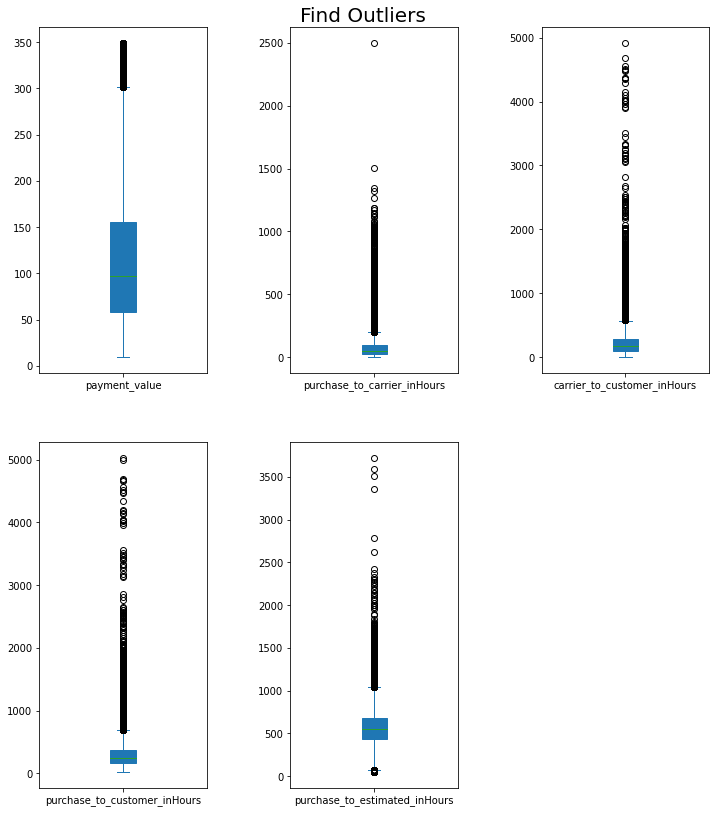

In [ ]:
#plot boxplot for each variables
# select columns to plot
plot_columns = statdesc_use.columns.tolist()
# subplots
statdesc_use.plot(subplots=True, layout=(2,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=20, y=0.9)
plt.subplots_adjust(wspace=0.5)

## Checking Outliers

I decided to check any outer outliers purchase_to_customer_inHours columns.

In [ ]:
# Define lower outer bound & upper outer bound for purchase_to_customer_inHours
q1_value = statdesc_use['purchase_to_customer_inHours'].quantile(.25)
q3_value = statdesc_use['purchase_to_customer_inHours'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Outer Bound and Upper Outer Bound
LOB_value = q1_value - (3*iqr_value)
UOB_value = q3_value + (3*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LOB = ',LOB_value)
print('UOB = ',UOB_value)

Q1 =  159.0
Q3 =  371.0
IQR =  212.0
LOB =  -477.0
UOB =  1007.0


In [ ]:
# check outliers for purchase_to_customer_inHours
statdesc_use[(statdesc_use['purchase_to_customer_inHours']<LOB_value)|(statdesc_use['purchase_to_customer_inHours']>UOB_value)]

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
69,0030d783f979fbc5981e75613b057344,RJ,78.27,503.0,508.0,1012.0,483.0
73,0032d07457ae9c806c79368d7d9ce96b,RJ,186.19,70.0,1131.0,1202.0,893.0
75,00335b686d693c7d72deeb12f8e89227,ES,80.79,43.0,1323.0,1367.0,578.0
91,003d804eef0e1b856881cd18e0cc0d4c,MA,312.74,98.0,1200.0,1299.0,724.0
167,0084e195fbd72ae51599af47f04afede,RS,113.03,19.0,1202.0,1222.0,624.0
...,...,...,...,...,...,...,...
90716,fe1466a3d7546b7ae29bcd953b472339,CE,169.64,11.0,1056.0,1068.0,520.0
90808,fe58b25c8ebdc65c3d4cb34070bf9e5d,RJ,69.03,575.0,450.0,1026.0,506.0
90994,fedc85bb24209961b595782f2c259c4a,BA,131.58,13.0,995.0,1009.0,700.0
91034,fef33d02a77400304a29dc5bbfe6bc4b,SP,80.20,45.0,1198.0,1243.0,529.0


In [ ]:
# remove the outer outliers for purchase_to_customer_inHours
statdesc_cleaned = statdesc_use[(statdesc_use['purchase_to_customer_inHours']>LOB_value)&(statdesc_use['purchase_to_customer_inHours']<UOB_value)]

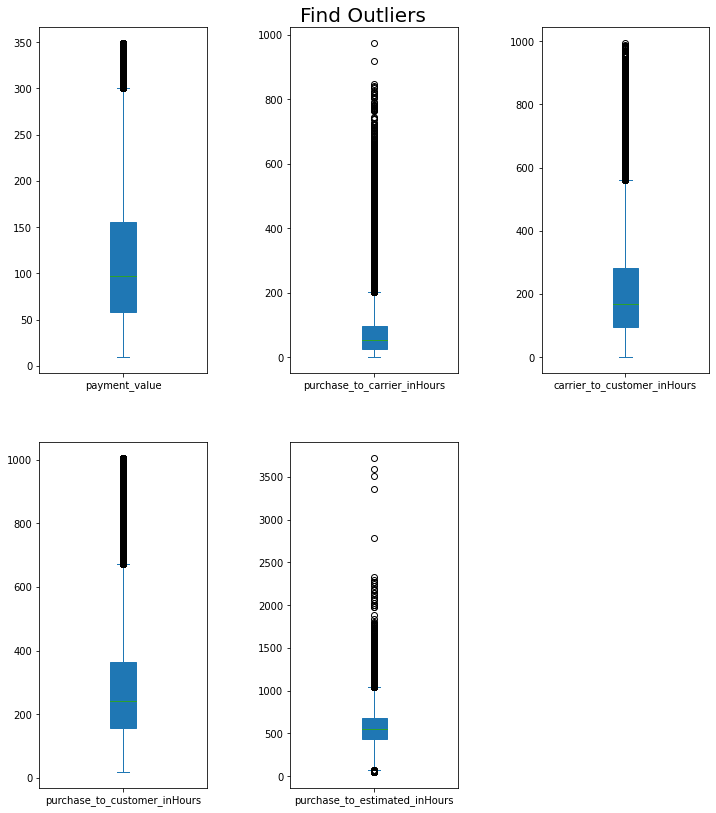

In [ ]:
#plot boxplot for each variables again after removing outliers
# select columns to plot
plot_columns = statdesc_cleaned.columns.tolist()
# subplots
statdesc_cleaned.plot(subplots=True, layout=(2,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=20, y=0.9)
plt.subplots_adjust(wspace=0.5)

I decided to check any outliers in purchase_to_estimated_inHours column.

In [ ]:
# Define lower outer bound & upper outer bound for purchase_to_estimated_inHours
q1_value = statdesc_cleaned['purchase_to_estimated_inHours'].quantile(.25)
q3_value = statdesc_cleaned['purchase_to_estimated_inHours'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Outer Bound and Upper Outer Bound
LOB_value = q1_value - (3*iqr_value)
UOB_value = q3_value + (3*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LOB = ',LOB_value)
print('UOB = ',UOB_value)

Q1 =  435.0
Q3 =  677.0
IQR =  242.0
LOB =  -291.0
UOB =  1403.0


In [ ]:
# check outliers
statdesc_cleaned[(statdesc_cleaned['purchase_to_estimated_inHours']<LOB_value)|(statdesc_cleaned['purchase_to_estimated_inHours']>UOB_value)]

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
750,021d08e4057e5b6414c8d2f69f4f72a0,MG,66.03,426.0,109.0,535.0,1734.0
862,026d16bd3f41638e1003e974e5487904,PB,239.80,148.0,529.0,678.0,2007.0
1056,02f4dd90ba0feb8ec394cac05862d2b5,AM,141.65,190.0,470.0,660.0,1711.0
1655,048d699adf41881d80ac3ed5f632a3aa,ES,186.79,61.0,266.0,327.0,1421.0
2107,05ca3bba2e4c3bc5c601b57af96cf3cf,RS,84.99,66.0,561.0,627.0,1449.0
...,...,...,...,...,...,...,...
89599,fafb40d4bbf282fe7b9bbafcc2eef58a,SP,32.42,120.0,165.0,286.0,1617.0
89717,fb52c1aeadce7c26d4c57e429909eab6,SP,267.90,452.0,190.0,643.0,1778.0
90414,fd3d7abaecfb6a9be0b4b59e35e59f4e,PR,161.65,649.0,174.0,824.0,1499.0
90717,fe157fed1771944584f95dce138eefad,RR,305.43,135.0,368.0,504.0,1469.0


In [ ]:
# remove the outer outliers
statdesc_cleaned2 = statdesc_cleaned[(statdesc_cleaned['purchase_to_estimated_inHours']>LOB_value)&(statdesc_cleaned['purchase_to_estimated_inHours']<UOB_value)]
statdesc_cleaned2

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,218.04,283.0,318.0,602.0,970.0
...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,139.88,244.0,148.0,392.0,806.0
91377,fffc94f6ce00a00581880bf54a75a037,MA,343.40,46.0,370.0,416.0,586.0
91378,fffce4705a9662cd70adb13d4a31832d,SP,116.85,70.0,45.0,115.0,414.0
91379,fffe18544ffabc95dfada21779c9644f,SP,64.71,19.0,26.0,46.0,240.0


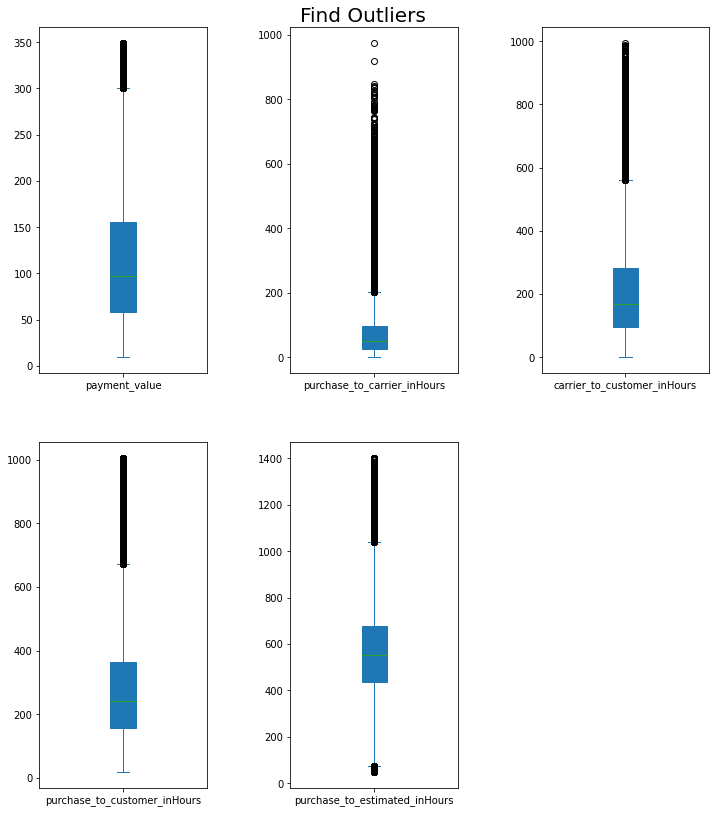

In [ ]:
#plot boxplot for each variables again after removing outliers
# select columns to plot
plot_columns = statdesc_cleaned2.columns.tolist()
# subplots
statdesc_cleaned2.plot(subplots=True, layout=(2,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=20, y=0.9)
plt.subplots_adjust(wspace=0.5)

I decided to check any outer outliers purchase_to_carrier_inHours and carrier_to_customer_inHours	columns.

In [ ]:
# Define lower outer bound & upper outer bound for purchase_to_carrier_inHours
q1_value = statdesc_cleaned2['purchase_to_carrier_inHours'].quantile(.25)
q3_value = statdesc_cleaned2['purchase_to_carrier_inHours'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Outer Bound and Upper Outer Bound
LOB_value = q1_value - (3*iqr_value)
UOB_value = q3_value + (3*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LOB = ',LOB_value)
print('UOB = ',UOB_value)

Q1 =  26.0
Q3 =  96.0
IQR =  70.0
LOB =  -184.0
UOB =  306.0


In [ ]:
# check outliers
statdesc_cleaned2[(statdesc_cleaned2['purchase_to_carrier_inHours']<LOB_value)|(statdesc_cleaned2['purchase_to_carrier_inHours']>UOB_value)]

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
33,0016dfedd97fc2950e388d2971d718c7,BA,70.55,420.0,153.0,574.0,796.0
83,0036757472ece3dde52fd4bfd929c90e,SP,203.03,448.0,54.0,503.0,753.0
128,005e5166e99d1e4d0c4f808b0540ba94,SC,136.70,349.0,476.0,825.0,516.0
262,00c00d5b36157595e21108ba1da2828f,SP,312.92,401.0,149.0,550.0,364.0
319,00ea690fe8c5eba029a3884243a02352,GO,49.10,334.0,231.0,565.0,742.0
...,...,...,...,...,...,...,...
91158,ff49f52e3e1a9422bc1899208d5b8591,SP,32.68,525.0,21.0,546.0,341.0
91202,ff7400d904161b62b6e830b3988f5cbd,BA,154.96,345.0,351.0,696.0,968.0
91287,ffb5af8b918083c3291c62b20fa89319,SP,177.02,546.0,341.0,887.0,1206.0
91359,ffeeb911d070bea3dd20bd5fd01da5e8,SP,95.69,335.0,120.0,455.0,556.0


In [ ]:
# remove the outer outliers
statdesc_cleaned3 = statdesc_cleaned2[(statdesc_cleaned2['purchase_to_carrier_inHours']>LOB_value)&(statdesc_cleaned2['purchase_to_carrier_inHours']<UOB_value)]
statdesc_cleaned3

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,218.04,283.0,318.0,602.0,970.0
...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,139.88,244.0,148.0,392.0,806.0
91377,fffc94f6ce00a00581880bf54a75a037,MA,343.40,46.0,370.0,416.0,586.0
91378,fffce4705a9662cd70adb13d4a31832d,SP,116.85,70.0,45.0,115.0,414.0
91379,fffe18544ffabc95dfada21779c9644f,SP,64.71,19.0,26.0,46.0,240.0


In [ ]:
# Define lower outer bound & upper outer bound for carrier_to_customer_inHours
q1_value = statdesc_cleaned3['carrier_to_customer_inHours'].quantile(.25)
q3_value = statdesc_cleaned3['carrier_to_customer_inHours'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Outer Bound and Upper Outer Bound
LOB_value = q1_value - (3*iqr_value)
UOB_value = q3_value + (3*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LOB = ',LOB_value)
print('UOB = ',UOB_value)

Q1 =  97.0
Q3 =  282.0
IQR =  185.0
LOB =  -458.0
UOB =  837.0


In [ ]:
# check outliers
statdesc_cleaned3[(statdesc_cleaned3['carrier_to_customer_inHours']<LOB_value)|(statdesc_cleaned3['carrier_to_customer_inHours']>UOB_value)]

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
137,00685d31ae12e47470ba5c18ba74f22c,RS,75.17,46.0,854.0,900.0,698.0
267,00c47fefb9a49baec12ab3654d7f548e,AP,266.69,22.0,982.0,1004.0,1343.0
421,012670c73246a753cbde0a215c2b9e8f,RJ,114.84,74.0,911.0,985.0,772.0
470,014e78d1239f19fdcafd760d3e52f923,RS,28.50,82.0,914.0,997.0,733.0
618,01bc343311e5b8090b64d6ab287a5cf0,RS,74.18,27.0,963.0,991.0,657.0
...,...,...,...,...,...,...,...
90281,fce6ebf0ce28cde1c71f1f4160c8e4b5,CE,71.88,47.0,845.0,893.0,726.0
90296,fcf62e3aab276898567e4ab7e973417f,ES,60.20,21.0,890.0,911.0,560.0
90755,fe36a827e3e9e0a6f5e11b0be2055727,SP,55.69,71.0,931.0,1003.0,508.0
90913,fe9eb7fc7765ab4b09f817fda0b63089,RJ,120.18,27.0,918.0,946.0,681.0


In [ ]:
# remove the outer outliers
statdesc_cleaned_ok = statdesc_cleaned3[(statdesc_cleaned3['carrier_to_customer_inHours']>LOB_value)&(statdesc_cleaned3['carrier_to_customer_inHours']<UOB_value)]
statdesc_cleaned_ok

,order_id,customer_state,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,72.19,153.0,29.0,182.0,375.0
1,00018f77f2f0320c557190d7a144bdd3,SP,259.83,195.0,193.0,389.0,445.0
2,000229ec398224ef6ca0657da4fc703e,MG,216.87,46.0,144.0,190.0,513.0
3,00024acbcdf0a6daa1e931b038114c75,SP,25.78,51.0,96.0,147.0,277.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,218.04,283.0,318.0,602.0,970.0
...,...,...,...,...,...,...,...
91376,fffbee3b5462987e66fb49b1c5411df2,MG,139.88,244.0,148.0,392.0,806.0
91377,fffc94f6ce00a00581880bf54a75a037,MA,343.40,46.0,370.0,416.0,586.0
91378,fffce4705a9662cd70adb13d4a31832d,SP,116.85,70.0,45.0,115.0,414.0
91379,fffe18544ffabc95dfada21779c9644f,SP,64.71,19.0,26.0,46.0,240.0


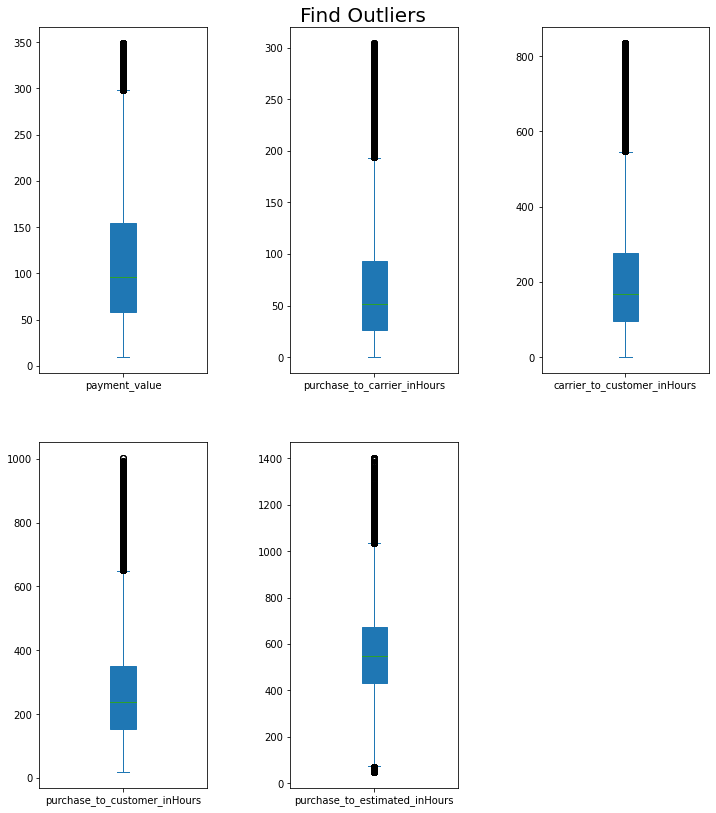

In [ ]:
#plot boxplot for each variables again after removing outliers
# select columns to plot
plot_columns = statdesc_cleaned_ok.columns.tolist()
# subplots
statdesc_cleaned_ok.plot(subplots=True, layout=(2,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=20, y=0.9)
plt.subplots_adjust(wspace=0.5)

In [ ]:
print('Before removing outliers, there are {} rows data.' .format(len(statdesc_use)))
print('After removing outliers, there are {} rows data.' .format(len(statdesc_cleaned_ok)))

Before removing outliers, there are 88763 rows data.
After removing outliers, there are 85144 rows data.


## Perform Descriptive Statistics

**Descriptive Statistics in General**

In [ ]:
# check again
df_statdesc_cleaned_ok = statdesc_cleaned_ok.describe()
df_statdesc_cleaned_ok

,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
count,85144.000000,85144.000000,85144.000000,85144.000000,85144.000000
mean,114.183757,66.928169,204.373274,271.801748,555.899969
std,71.976101,53.648094,152.397880,163.607028,197.216235
min,9.590000,0.000000,0.000000,18.000000,48.000000
25%,58.130000,26.000000,96.000000,154.000000,433.000000
50%,96.220000,51.000000,168.000000,237.000000,549.000000
75%,153.960000,93.000000,276.000000,352.000000,673.000000
max,349.400000,305.000000,836.000000,1003.000000,1402.000000


In [ ]:
# add kurtosis, skewness, variance
df_statdesc_cleaned_ok.loc['kurtosis'] = statdesc_cleaned_ok[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].kurt()
df_statdesc_cleaned_ok.loc['skewness'] = statdesc_cleaned_ok[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].skew()
df_statdesc_cleaned_ok.loc['variance'] = statdesc_cleaned_ok[['payment_value', 'purchase_to_carrier_inHours',	'carrier_to_customer_inHours',	'purchase_to_customer_inHours',	'purchase_to_estimated_inHours']].var()
df_statdesc_cleaned_ok

,payment_value,purchase_to_carrier_inHours,carrier_to_customer_inHours,purchase_to_customer_inHours,purchase_to_estimated_inHours
count,85144.000000,85144.000000,85144.000000,85144.000000,85144.000000
mean,114.183757,66.928169,204.373274,271.801748,555.899969
std,71.976101,53.648094,152.397880,163.607028,197.216235
min,9.590000,0.000000,0.000000,18.000000,48.000000
25%,58.130000,26.000000,96.000000,154.000000,433.000000
50%,96.220000,51.000000,168.000000,237.000000,549.000000
75%,153.960000,93.000000,276.000000,352.000000,673.000000
max,349.400000,305.000000,836.000000,1003.000000,1402.000000
kurtosis,0.595897,2.283810,1.856780,1.421421,0.725952
skewness,1.050614,1.450448,1.333740,1.167295,0.430348


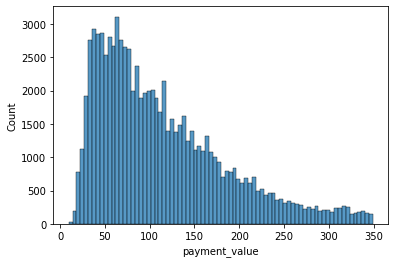

In [ ]:
# Histogram plot for payment_value
sns.histplot(statdesc_cleaned_ok['payment_value'])

**Payment_Value**

*   Average amount spent on the e-commerce is 114.18
*   Median amount spent on the e-commerce is 96.22
*   The skewness of payment_value is + 1.05, which means the distribution is right skewed.

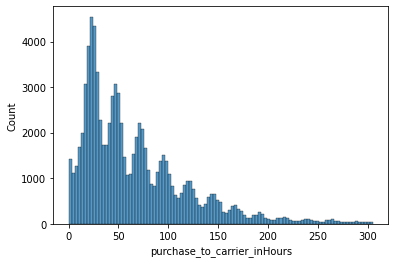

In [ ]:
# Histogram plot for purchase_to_carrier_inHours	
sns.histplot(statdesc_cleaned_ok['purchase_to_carrier_inHours'])

**Purchase to Carrier (in Hours)**


*   It takes around 66.92 hours or about 2~3 days in average from purchase time until the order is handed over to carrier.
*   But in term of median, it takes around 51 hours or 2 days from purchase time until the order is handed over to carrier.
*   The skewness of purchase_to_carrier_inHours is + 1.45, which means the distribution is right skewed.

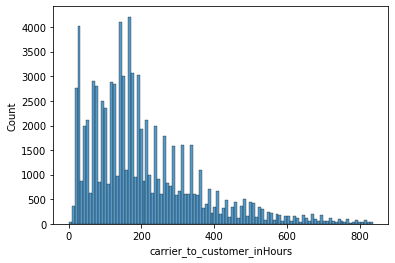

In [ ]:
# Histogram plot for carrier_to_customer_inHours
sns.histplot(statdesc_cleaned_ok['carrier_to_customer_inHours'])

**Carrier to Customer (in Hours)**


*   It takes around 204.37 hours or about 8~9 days in average from carrier to hand over to customer.
*   But in term of median, it takes around 168 hours or 7 days from carrier to hand over to customer.
*   The skewness of carrier_to_customer_inHours is + 1.33, which means the distribution is right skewed.

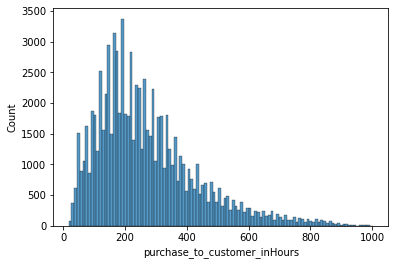

In [ ]:
# Histogram plot for purchase_to_customer_inHours
sns.histplot(statdesc_cleaned_ok['purchase_to_customer_inHours'])

**Purchase to Customer (in Hours)**

*   It takes around 271.80 hours or about 11 days in average from purchase time until the order is delivered.
*   But in term of median, it takes around 237 hours or 9~10 days from purchase time until the order is delivered.
*   The skewness of purchase_to_customer_inHours is + 1.16, which means the distribution is right skewed.

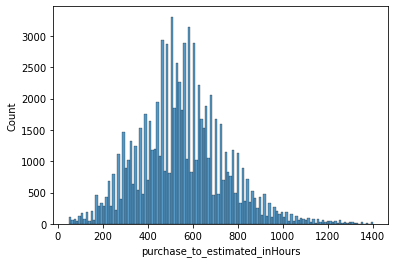

In [ ]:
# Histogram plot for purchase_to_customer_inHours
sns.histplot(statdesc_cleaned_ok['purchase_to_estimated_inHours'])

**Purchase to Estimated Delivery (in Hours)**

*   Average estimated time from customer's purchase is made until the order is delivered is around 555.89 hours or about 23 days.
*   In term of median, it also takes around 549 hours or about 23 days
*   The skewness of purchase_to_estimated_inHours is + 0.43, which means the distribution is roughly normally distributed.

## Summary Insights

*   There is around 7.98% overdue delivered orders.
*   Amount spent on the e-commerce is around 96.22 (based on delivered orders).
*   It takes around 2~3 days for the e-commerce to process the order and handed it over to carrier, and it takes around a week for the carrier to deliver the order to customer in general. But, we need to consider the distance from the e-commerce to the customer's address.
*   It takes around 9~10 days in general from purchase time until the order is delivered while the average estimated time from customer's purchase is made until the order is delivered is around 555.89 hours or about 23 days.
*   In this e-commerce, the customers come from 27 different states.
*   There are 4 methods of payment that available in this e-commerce.


# EDA

## Summary Insights

* From Sept 2016 to Nov 2017, number of order and total sales in the e-commerce tend to increase, but it decreases in Dec 2017. Start from Jan 2018, number of order increases and total sales from last month, but until Aug 2018, they tend to decrease slowly. In Sept 2018, both number of order and total sales fell to near zero. But, it seems that the records is not loaded into the dataset yet. 

* Average Order Value is quite stable for each month (around 110).

* The customer in this e-commerce tend to do purchase in weekday (Monday - Friday) rather than weekend (Saturday & Sunday).

* The most favourite payment type in the e-commerce is credit card, followed by boleto payment type.

* Most of the customer do purchase in 10 AM to 11 PM.

* From Jan 2018 - Aug 2018, around 90% of total sales and total customer are coming from ten states. There are São Paulo (SP) which contributes the most (around 40% of total sales and total customer), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (PR), Santa Catarina (SC), Bahia (BA), Distrito Federal (DF), Espírito Santo (ES), and Goiás (GO).

* But, Top 8 States that have lowest Average Revenue Per Customer  also come from São Paulo (SP) which has the lowest ARPC (around 105.6), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (PR), Distrito Federal (DF), Espírito Santo (ES), and Goiás (GO). These states have most customer and contribute most sales.

### Prepare EDA

In [ ]:
# Call the DataFrame
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP


In [ ]:
df.shape

(95426, 14)

In [ ]:
df['order_id'].nunique()

91381

In [ ]:
df['order_status'].value_counts()

delivered      92680
shipped         1043
canceled         579
unavailable      574
invoiced         275
processing       268
created            5
approved           2
Name: order_status, dtype: int64

For doing Exploratory Data Analysis, I will exclude canceled and unavailable order_status, and also drop order_delivered_carrier_date,	order_delivered_customer_date,	order_estimated_delivery_date	columns.

In [ ]:
# Exclude canceled and unavaiable orders
dfeda = df[~df['order_status'].isin(['canceled', 'unavailable'])]
dfeda['order_status'].value_counts()

delivered     92680
shipped        1043
invoiced        275
processing      268
created           5
approved          2
Name: order_status, dtype: int64

In [ ]:
dfeda

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,1,credit_card,3,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Drop unused columns (order_delivered_carrier_date,	order_delivered_customer_date,	order_estimated_delivery_date, payment_sequential, payment_installments)
dfeda.drop(columns=['order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date', 'payment_sequential', 'payment_installments'], inplace = True)
dfeda

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Checking data type
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94273 entries, 0 to 103882
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  94273 non-null  object        
 1   payment_type              94273 non-null  object        
 2   payment_value             94273 non-null  float64       
 3   customer_id               94273 non-null  object        
 4   order_status              94273 non-null  object        
 5   order_purchase_timestamp  94273 non-null  datetime64[ns]
 6   customer_unique_id        94273 non-null  object        
 7   customer_city             94273 non-null  object        
 8   customer_state            94273 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.2+ MB


### Insight 1
**Is there any sales trend based on number of orders?**

**How is the total sales in each month?**

**How is Average Order Value in each month?**

In [ ]:
# Adding new column to extract Year and Month from order_purchase_timestamp
dfeda1 = dfeda.copy()
dfeda1['Year_Month'] = dfeda1['order_purchase_timestamp'].dt.strftime('%Y-%m')
dfeda1

,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,Year_Month
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,2017-02
...,...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,2018-06
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,2018-04
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,2017-10
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,2017-08


In [ ]:
# check duplicate
dfeda1['order_id'].nunique()

90301

In [ ]:
# Drop payment_type column
dfeda1.drop(columns='payment_type',inplace = True)
dfeda1

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,Year_Month
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,2017-02
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,2018-06
103878,fffc94f6ce00a00581880bf54a75a037,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,2018-04
103880,fffce4705a9662cd70adb13d4a31832d,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,2017-10
103881,fffe18544ffabc95dfada21779c9644f,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,2017-08


In [ ]:
# Group by order_id
dfeda1 = pd.DataFrame(dfeda1.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state',	'Year_Month'])['payment_value'].agg('sum')).reset_index()
dfeda1

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,Year_Month,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,2017-09,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,2017-04,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,2018-01,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,2018-08,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,2017-02,218.04
...,...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,2018-06,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,2018-04,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,2017-10,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,2017-08,64.71


In [ ]:
# Find number of orders each month
eda1 = dfeda1.groupby('Year_Month').agg('count')['order_id']
eda1 = pd.DataFrame(eda1).reset_index()
eda1.rename(columns = {'order_id':'total_order'}, inplace = True)
eda1

,Year_Month,total_order
0,2016-09,1
1,2016-10,253
2,2016-12,1
3,2017-01,688
4,2017-02,1570
5,2017-03,2402
6,2017-04,2173
7,2017-05,3347
8,2017-06,2972
9,2017-07,3670


From Sept 2016 to Nov 2017, number of order and total sales in the e-commerce tend to increase, but it decreases in Dec 2017. Start from Jan 2018, number of order increases and total sales from last month, but until Aug 2018, they tend to decrease slowly. In Sept 2018, both number of order and total sales fell to near zero. But, it seems that the records is not loaded into the dataset yet. So I decided to remove the Sept 2018 record.

In [ ]:
eda1 = eda1[eda1['Year_Month']!='2018-09']
eda1

,Year_Month,total_order
0,2016-09,1
1,2016-10,253
2,2016-12,1
3,2017-01,688
4,2017-02,1570
5,2017-03,2402
6,2017-04,2173
7,2017-05,3347
8,2017-06,2972
9,2017-07,3670


Text(0, 0.5, 'total_order')

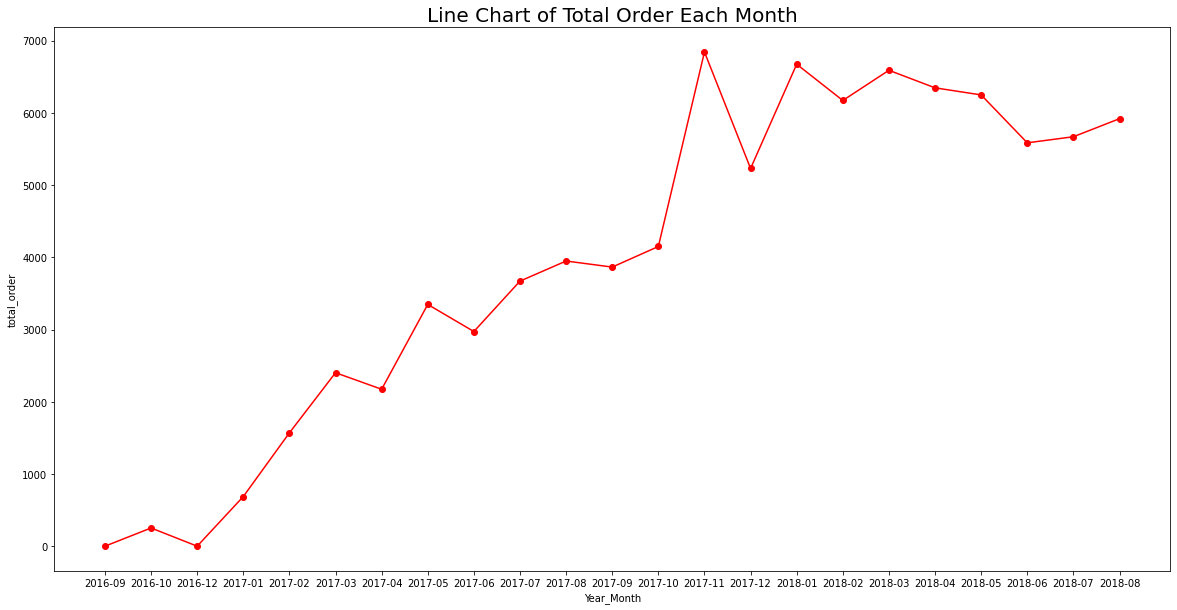

In [ ]:
eda1=eda1.set_index('Year_Month')
# Create the Line Chart of Total Order
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(eda1['total_order'],'ro-')
ax.set_title('Line Chart of Total Order Each Month', fontsize = 20)
ax.set_xlabel('Year_Month')
ax.set_ylabel('total_order')

In [ ]:
# Find total sales each month
eda1s = dfeda1.groupby('Year_Month').agg('sum')['payment_value']
eda1s = pd.DataFrame(eda1s).reset_index()
eda1s.rename(columns = {'payment_value':'total_sales'}, inplace = True)
eda1s = eda1s[eda1s['Year_Month']!='2018-09']
eda1s

,Year_Month,total_sales
0,2016-09,136.23
1,2016-10,29584.88
2,2016-12,19.62
3,2017-01,76080.37
4,2017-02,175784.28
5,2017-03,270909.08
6,2017-04,252588.68
7,2017-05,377037.45
8,2017-06,329399.82
9,2017-07,416497.82


Text(0, 0.5, 'total_sales')

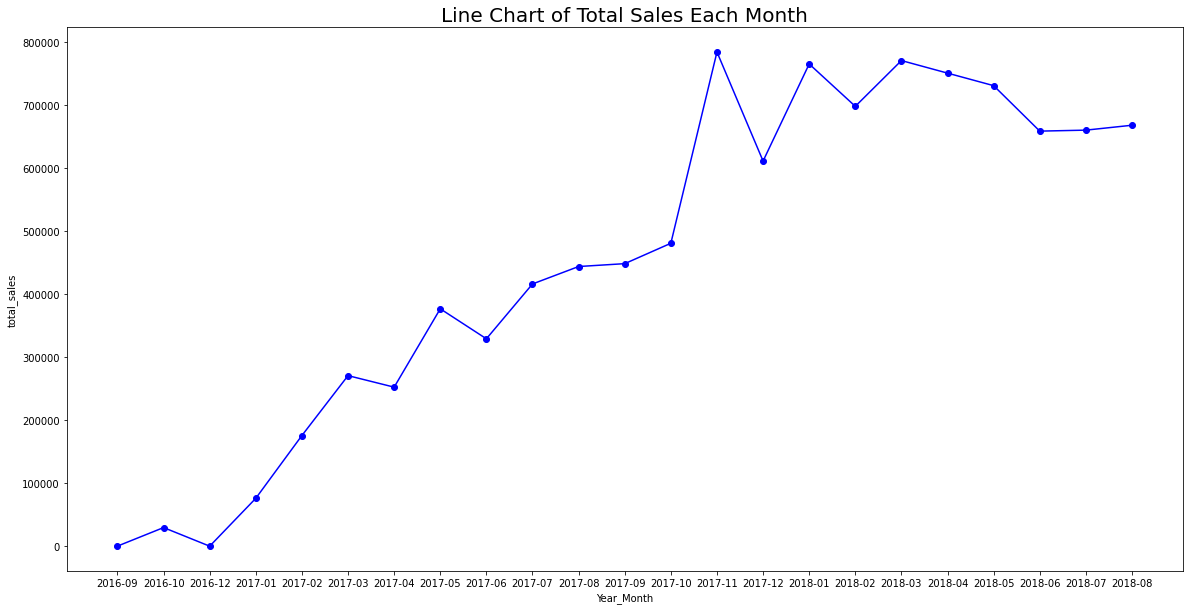

In [ ]:
eda1s=eda1s.set_index('Year_Month')
# Create the Line Chart of Total Sales
fig = plt.figure(figsize=(20,10))
axs = fig.add_subplot(1, 1, 1)

axs.plot(eda1s['total_sales'],'bo-')
axs.set_title('Line Chart of Total Sales Each Month', fontsize = 20)
axs.set_xlabel('Year_Month')
axs.set_ylabel('total_sales')

In [ ]:
# Find AOV for each month by merging eda1 and eda1s
eda1_ok = pd.merge(eda1.reset_index(), eda1s.reset_index(), how='inner')
eda1_ok['AOV'] = eda1_ok['total_sales']/eda1_ok['total_order']
eda1_ok = eda1_ok.set_index('Year_Month')
eda1_ok

,total_order,total_sales,AOV
Year_Month,,,
2016-09,1,136.23,136.230000
2016-10,253,29584.88,116.936285
2016-12,1,19.62,19.620000
2017-01,688,76080.37,110.581933
2017-02,1570,175784.28,111.964510
2017-03,2402,270909.08,112.784796
2017-04,2173,252588.68,116.239613
2017-05,3347,377037.45,112.649373
2017-06,2972,329399.82,110.834394


Text(0, 0.5, 'AOV')

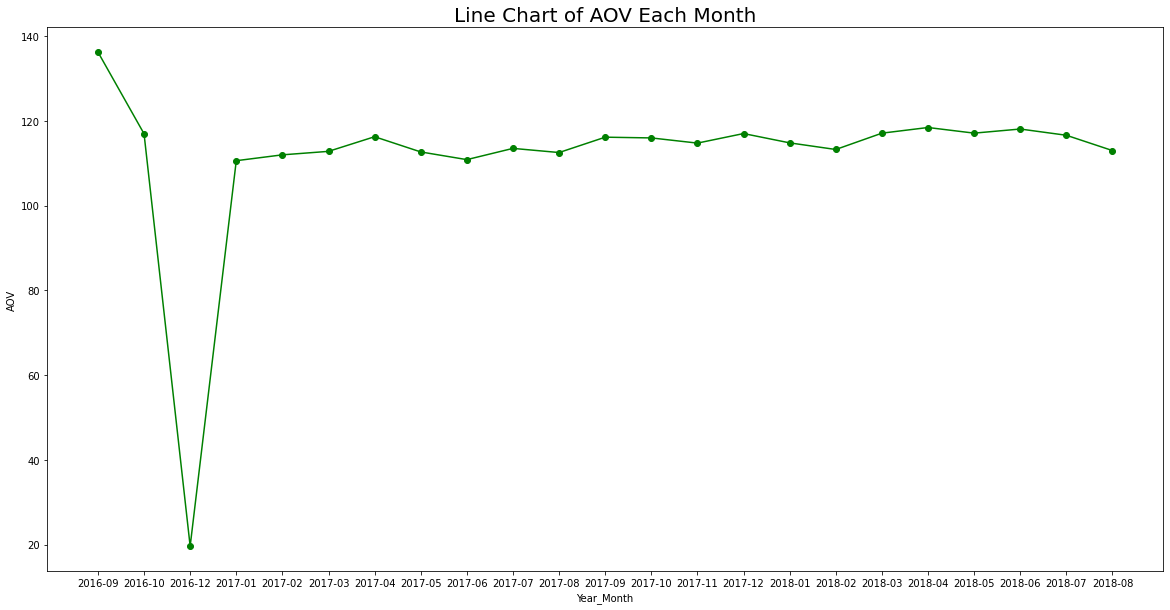

In [ ]:
# Create the Line Chart of AOV
fig = plt.figure(figsize=(20,10))
ax_ok = fig.add_subplot(1, 1, 1)

ax_ok.plot(eda1_ok['AOV'],'go-')
ax_ok.set_title('Line Chart of AOV Each Month', fontsize = 20)
ax_ok.set_xlabel('Year_Month')
ax_ok.set_ylabel('AOV')

**From the graph we can conclude that :**


*   From Sept 2016 to Nov 2017, number of order and total sales in the e-commerce tend to increase. As we can see, largest increment happened from Oct 2017 to Nov 2017, but it decreases in Dec 2017. We need to investigate back in order to determine the reasons behind large increment that happened between Oct 2017 and November 2017.

*   Start from Jan 2018, number of order increases and total sales from last month, but until Aug 2018, they tend to decrease slowly. In Sept 2018, both number of order and total sales fell to near zero. After I check the dataset, it seems that the records is not loaded into the dataset yet, the number of order less than 50 orders and most of them are canceled orders. (So I decided to remove Sept 2018 records)

*   Average Order Value is quite stable for each month (around 110). AOV in Sept 2016 and Dec 2016 are fluctuative because total non-canceled or unavailable order is only 1 order.

### Insight 2
**Which day of the week is the busiest?**

In [ ]:
# Call the DataFrame
dfeda2 = dfeda.copy()
dfeda2

,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Drop payment_type column
dfeda2.drop(columns='payment_type',inplace = True)
# Group by order_id
dfeda2 = pd.DataFrame(dfeda2.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state'])['payment_value'].agg('sum')).reset_index()
dfeda2

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71


In [ ]:
# Create a new column called 'Days'
dfeda2['days_of_week'] = dfeda2['order_purchase_timestamp'].dt.day_name()
dfeda2['year'] = dfeda2['order_purchase_timestamp'].dt.strftime('%Y')
dfeda2

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,days_of_week,year
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,Wednesday,2017
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,Wednesday,2017
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,Sunday,2018
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,Wednesday,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,Saturday,2017
...,...,...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,Tuesday,2018
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,Monday,2018
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85,Monday,2017
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71,Monday,2017


In [ ]:
# Find number of orders each month in total from 2016 to 2018
eda2 = dfeda2.groupby('days_of_week').agg('count')['order_id']
eda2 = pd.DataFrame(eda2)
eda2.rename(columns = {'order_id':'total_order'}, inplace = True)
eda2=eda2.sort_values(by='total_order',ascending=False).reset_index()
eda2

,days_of_week,total_order
0,Monday,14668
1,Tuesday,14497
2,Wednesday,14074
3,Thursday,13413
4,Friday,12766
5,Sunday,10986
6,Saturday,9897


Text(0.5, 1.0, 'Bar Chart of Total Order Each Day')

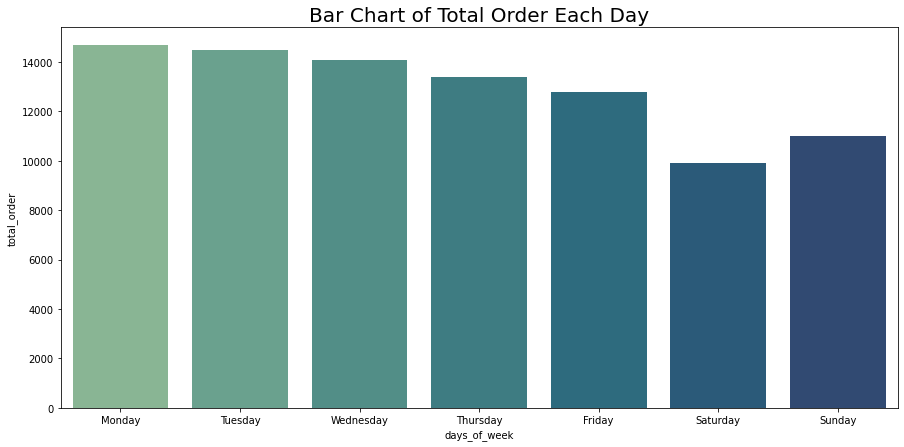

In [ ]:
# Create the Bar Chart in total from 2016 to 2018
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(x='days_of_week', y="total_order", data=eda2, order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="crest")
ax.set_title('Bar Chart of Total Order Each Day', fontsize = 20)

In [ ]:
# Find number of orders each month in 2016, 2017, 2018
eda2_p = dfeda2.groupby(['year','days_of_week']).agg('count')['order_id']
eda2_p = pd.DataFrame(eda2_p)
eda2_p.rename(columns = {'order_id':'total_order'}, inplace = True)
eda2_p=eda2_p.sort_values(by=['year','total_order'],ascending=False).reset_index()
eda2_p

,year,days_of_week,total_order
0,2018,Monday,8127
1,2018,Tuesday,7945
2,2018,Wednesday,7922
3,2018,Thursday,7462
4,2018,Friday,6523
5,2018,Sunday,5919
6,2018,Saturday,5295
7,2017,Tuesday,6500
8,2017,Monday,6498
9,2017,Friday,6210


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


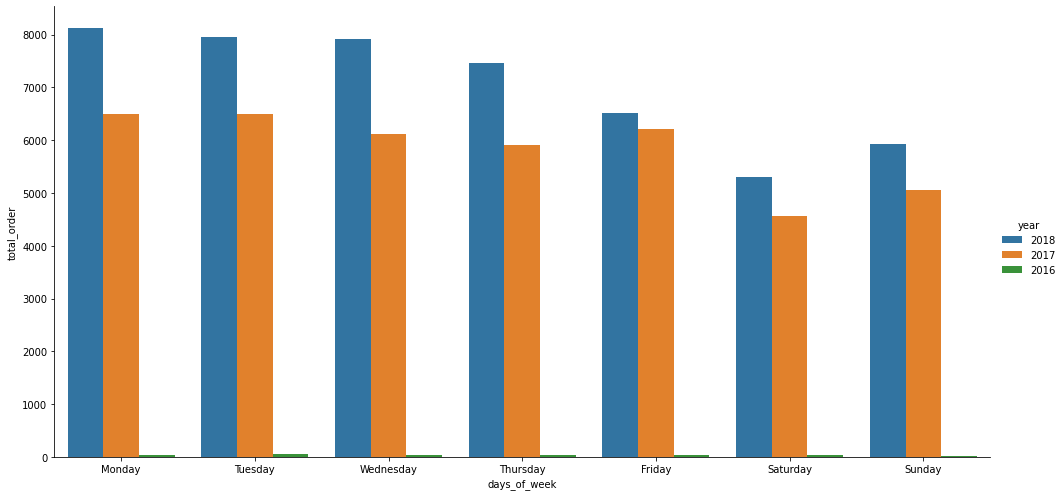

In [ ]:
# Create the Bar Chart in each year from 2016 to 2018
sns.catplot(x='days_of_week', y="total_order", data=eda2_p, hue='year', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], kind='bar', size=7, aspect=2)

**From the analysis we can conclude that :**


*   In total from 2016 to 2018, total order in weekday (Monday - Friday) is greater than weekend (Saturday & Sunday). This is also happened in each year (from above table), Saturday and Sunday always have least total orders than the other days. Which means that the customer tend to buy in weekday rather than weekend.

*   Monday and Tuesday become the busiest days in a week for three years.



### Insight 3
**What is the most favourite payment type?**

In [ ]:
# Call the DataFrame
dfeda3 = dfeda.copy()
dfeda3

,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Find number of orders in each payment_type
eda3 = dfeda3.groupby('payment_type').agg('count')['order_id']
eda3 = pd.DataFrame(eda3)
eda3.rename(columns = {'order_id':'total_order'}, inplace = True)
eda3 = eda3.sort_values(by='total_order',ascending=False).reset_index()
eda3

,payment_type,total_order
0,credit_card,69302
1,boleto,18295
2,voucher,5245
3,debit_card,1431


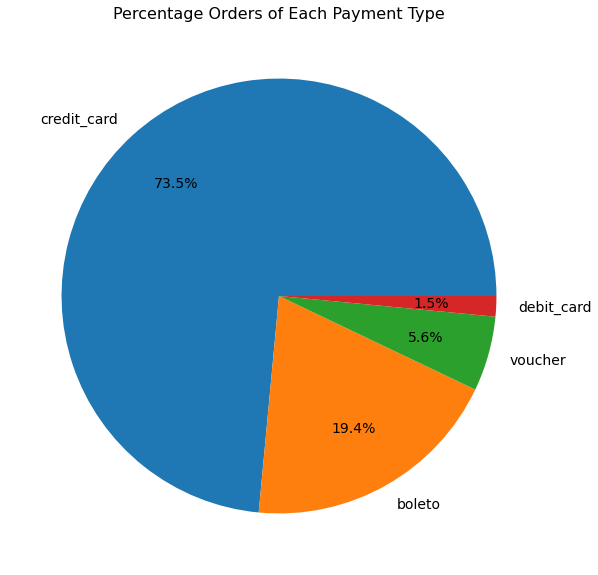

In [ ]:
# Create Pie chart for each payment_type
plt.figure(figsize=(10,10))
plt.title('Percentage Orders of Each Payment Type',fontsize=16)
plt.pie(eda3['total_order'],labels=eda3['payment_type'],autopct='%1.1f%%',pctdistance=0.7,labeldistance=1.1, textprops={'fontsize': 14})
plt.show()

**From the chart we can conclude that :**

* From total orders (which is not canceled or unavailable), 73.5% of total orders rows are paid by using credit_card, which makes credit card is the most favourite payment type in the e-commerce, and followed by boleto payment type (19.4% of total orders rows are paid by boleto).

* There are only 7.1% of total orders rows are paid by voucher and debit card.

* In this e-commerce, an order can be paid by several methods of payment.

### Insight 4
**Where are the customers coming from?**

In [ ]:
# Call the DataFrame
dfeda4 = dfeda.copy()
dfeda4

,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Drop payment_type column
dfeda4.drop(columns='payment_type',inplace = True)
# Group by order_id
dfeda4 = pd.DataFrame(dfeda4.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state'])['payment_value'].agg('sum')).reset_index()
dfeda4

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71


In [ ]:
# Find number of customer in each state by customer_id
eda4 = dfeda4.groupby('customer_state').agg('count')['customer_id']
eda4 = pd.DataFrame(eda4)
eda4.rename(columns = {'customer_id':'total_customer'}, inplace = True)
eda4 = eda4.sort_values(by='total_customer',ascending=False).reset_index()
# Add new column called cumulative percentage
eda4['cum_percent'] = 100 * (eda4['total_customer'].cumsum()/dfeda4['customer_id'].nunique()) 
eda4

,customer_state,total_customer,cum_percent
0,SP,38436,42.564313
1,RJ,11662,55.478898
2,MG,10613,67.231814
3,RS,4965,72.730092
4,PR,4574,77.795373
5,SC,3285,81.433207
6,BA,3023,84.780899
7,DF,1950,86.940344
8,ES,1866,89.006766
9,GO,1813,91.014496


**Top 10 States that have Most Customer**

In [ ]:
eda4_top = eda4.head(10)
eda4_top

,customer_state,total_customer,cum_percent
0,SP,38436,42.564313
1,RJ,11662,55.478898
2,MG,10613,67.231814
3,RS,4965,72.730092
4,PR,4574,77.795373
5,SC,3285,81.433207
6,BA,3023,84.780899
7,DF,1950,86.940344
8,ES,1866,89.006766
9,GO,1813,91.014496


Text(0.5, 1.0, 'Bar Chart of Total Customer Each State')

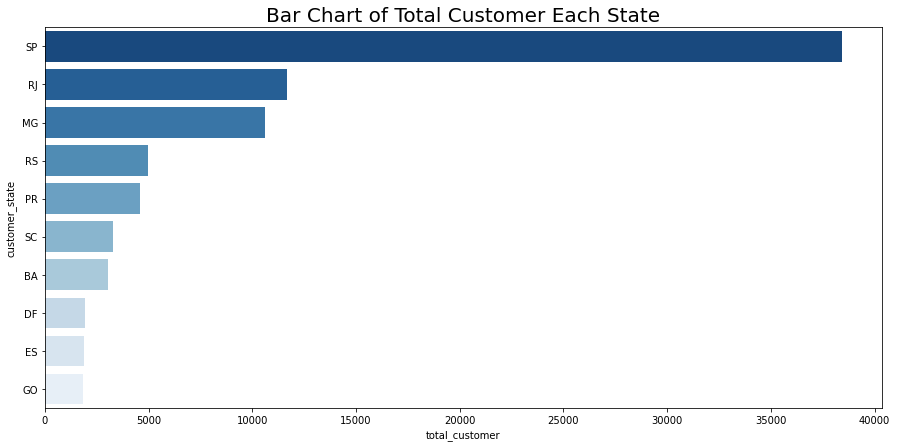

In [ ]:
# Create the Bar Chart in total from 2016 to 2018
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(y='customer_state', x="total_customer", data=eda4_top, orient='h', palette="Blues_r")
ax.set_title('Bar Chart of Total Customer Each State', fontsize = 20)

**From the analysis we can conclude that :**

* Most of the customers in this e-commerce come from São Paulo-SP (around 42.56% of total customers), followed by Rio de Janeiro-RJ (around 12.91% of total customers), and Minas Gerais-MG (around 11.76% of total customers).

* Around 91.01% of total customers are coming from ten states. There are São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (PR), Santa Catarina (SC), Bahia (BA),  Distrito Federal (DF), Espírito Santo (ES), and Goiás (GO).




### Insight 5
**What time does customer usually purchase in the e-commerce?**

In [ ]:
# Call the DataFrame
dfeda5 = dfeda.copy()
dfeda5

,order_id,payment_type,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,credit_card,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Drop payment_type column
dfeda5.drop(columns='payment_type',inplace = True)
# Group by order_id
dfeda5 = pd.DataFrame(dfeda5.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state'])['payment_value'].agg('sum')).reset_index()
dfeda5

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71


In [ ]:
# Adding new column to extract Time from order_purchase_timestamp
dfeda5['Hours'] = dfeda5['order_purchase_timestamp'].dt.strftime('%H')
dfeda5['year'] = dfeda5['order_purchase_timestamp'].dt.strftime('%Y')
dfeda5

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,Hours,year
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,08,2017
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,10,2017
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,14,2018
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,10,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,13,2017
...,...,...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,09,2018
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,13,2018
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85,17,2017
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71,23,2017


In [ ]:
dfeda5["Order_Hours"] = dfeda5["Hours"].replace(('00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'),('0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'))
dfeda5

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,Hours,year,Order_Hours
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,08,2017,8-9
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,10,2017,10-11
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,14,2018,14-15
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,10,2018,10-11
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,13,2017,13-14
...,...,...,...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,09,2018,9-10
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,13,2018,13-14
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85,17,2017,17-18
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71,23,2017,23-24


In [ ]:
dfeda5ok = dfeda5.drop(columns='Hours')
dfeda5ok

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,year,Order_Hours
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,2017,8-9
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,2017,10-11
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,2018,14-15
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,2018,10-11
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,2017,13-14
...,...,...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,2018,9-10
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,2018,13-14
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85,2017,17-18
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71,2017,23-24


In [ ]:
# Find number of orders each order hours
eda5 = dfeda5ok.groupby('Order_Hours').agg('count')['order_id']
eda5 = pd.DataFrame(eda5)
eda5.rename(columns = {'order_id':'total_order'}, inplace = True)
eda5 = eda5.reset_index()
eda5

,Order_Hours,total_order
0,0-1,2200
1,1-2,1069
2,10-11,5601
3,11-12,5998
4,12-13,5389
5,13-14,5907
6,14-15,5870
7,15-16,5797
8,16-17,6044
9,17-18,5600


Text(0.5, 1.0, 'Bar Chart of Total Order Each Hours')

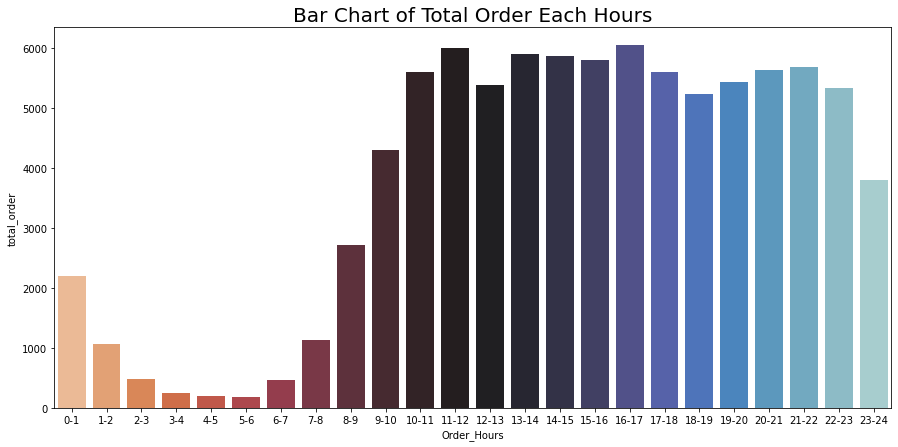

In [ ]:
# Create the Bar Chart in total for order hours
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(x='Order_Hours', y="total_order", data=eda5, order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'], palette="icefire_r")
ax.set_title('Bar Chart of Total Order Each Hours', fontsize = 20)

In [ ]:
# Find number of orders each hours in 2016, 2017, 2018
eda5_p = dfeda5.groupby(['year','Order_Hours']).agg('count')['order_id']
eda5_p = pd.DataFrame(eda5_p)
eda5_p.rename(columns = {'order_id':'total_order'}, inplace = True)
eda5_p=eda5_p.sort_values(by=['year','total_order'],ascending=False).reset_index()
eda5_p

,year,Order_Hours,total_order
0,2018,16-17,3360
1,2018,11-12,3292
2,2018,14-15,3219
3,2018,13-14,3187
4,2018,15-16,3136
...,...,...,...
64,2016,0-1,5
65,2016,7-8,4
66,2016,2-3,3
67,2016,4-5,3


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


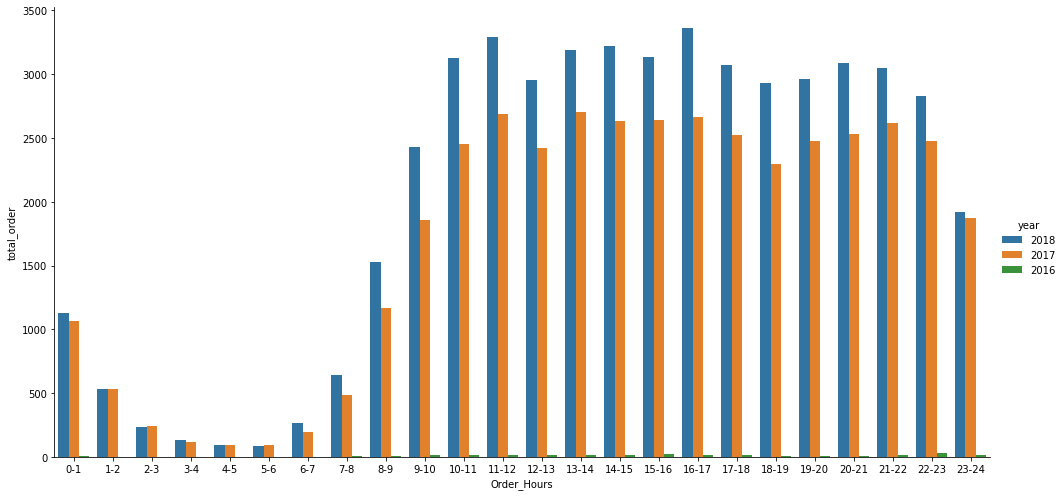

In [ ]:
# Create the Bar Chart in each year from 2016 to 2018
sns.catplot(x='Order_Hours', y="total_order", data=eda5_p, hue='year', order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'], kind='bar', size=7, aspect=2)

**From the analysis we can conclude that :**


*   From 2017 to 2018, most of the customer do purchase in 10 AM to 11 PM. (I decided not to see Year 2016 because at that time, the total order is still small). 

*   In 2018, highest total orders happened in 11-12 and 16-17.


### Insight 6
**Which state contributes the most to total sales in Jan 2018 - Aug 2018?**

In [ ]:
# Call the DataFrame
dfeda6 = dfeda.copy()

In [ ]:
# Drop payment_type column
dfeda6.drop(columns='payment_type',inplace = True)
# Group by order_id
dfeda6 = pd.DataFrame(dfeda6.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state'])['payment_value'].agg('sum')).reset_index()
dfeda6

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71


In [ ]:
# Adding column
dfeda6['year'] = dfeda6['order_purchase_timestamp'].dt.strftime('%Y')
dfeda6_2018 = dfeda6[dfeda6['year']=='2018']
dfeda6_2018

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,year
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,2018
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,2018
7,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,639d23421f5517f69d0c3d6e6564cf0e,santos,SP,157.60,2018
8,0005f50442cb953dcd1d21e1fb923495,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,0782c41380992a5a533489063df0eef6,jandira,SP,65.39,2018
9,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,delivered,2018-03-24 22:16:10,107e6259485efac66428a56f10801f4f,piracicaba,SP,68.87,2018
...,...,...,...,...,...,...,...,...,...
90291,fff8286f77788ab8b55b2e5747fa7dd8,e79f494063c25f5c673222d8a2cc6f47,delivered,2018-07-03 21:53:22,8d488a7bc7c301bd9781b70e7970eeac,belo horizonte,MG,40.27,2018
90295,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,6b42acb204802253acec6607ff3a9e0b,cordeiro,RJ,39.96,2018
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,2018
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,2018


In [ ]:
# Find total sales in each state in 2018
eda6 = dfeda6_2018.groupby('customer_state').agg('sum')['payment_value']
eda6 = pd.DataFrame(eda6)
eda6.rename(columns = {'payment_value':'total_sales'}, inplace = True)
eda6 = eda6.sort_values(by='total_sales',ascending=False).reset_index()
# Add new column called cumulative percentage
eda6['cum_percent'] = 100 * (eda6['total_sales'].cumsum()/dfeda6_2018['payment_value'].sum()) 
eda6

,customer_state,total_sales,cum_percent
0,SP,2357449.55,41.306051
1,RJ,724323.84,53.997290
2,MG,685964.75,66.016421
3,RS,307504.13,71.404354
4,PR,290819.46,76.499947
5,SC,215011.40,80.267269
6,BA,198441.19,83.744257
7,DF,132164.47,86.059976
8,GO,115641.81,88.086194
9,ES,115214.97,90.104933


**Top 10 States that contribute Most Sales**

In [ ]:
eda6_top = eda6.head(10)
eda6_top

,customer_state,total_sales,cum_percent
0,SP,2357449.55,41.306051
1,RJ,724323.84,53.997290
2,MG,685964.75,66.016421
3,RS,307504.13,71.404354
4,PR,290819.46,76.499947
5,SC,215011.40,80.267269
6,BA,198441.19,83.744257
7,DF,132164.47,86.059976
8,GO,115641.81,88.086194
9,ES,115214.97,90.104933


Text(0.5, 1.0, 'Bar Chart of Total Sales Each State')

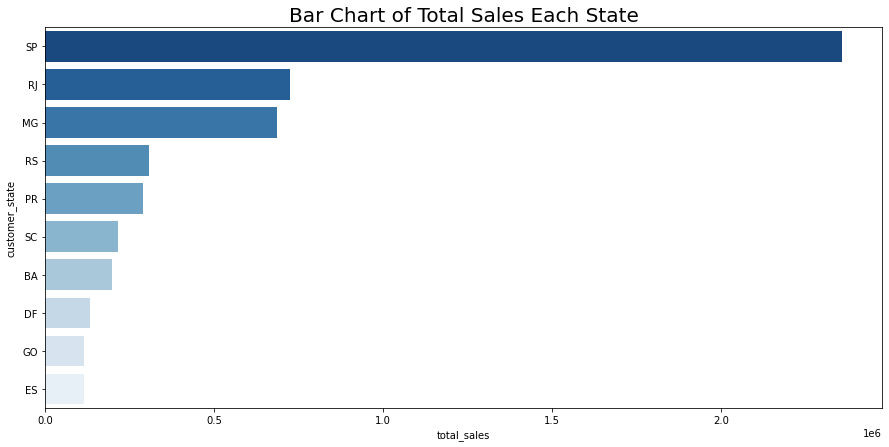

In [ ]:
# Create the Bar Chart in 2018
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(y='customer_state', x="total_sales", data=eda6_top, orient='h',palette='Blues_r')
ax.set_title('Bar Chart of Total Sales Each State', fontsize = 20)

**From the analysis we can conclude that :**

* Most of the sales in this e-commerce is contributed by São Paulo-SP (around 41.3% of total sales), followed by Rio de Janeiro-RJ (around 12.69% of total sales), and Minas Gerais-MG (around 12.02% of total sales).

* Around 90.1% of total sales are coming from ten states. There are São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (PR), Santa Catarina (SC), Bahia (BA),  Distrito Federal (DF), Espírito Santo (ES), and Goiás (GO).




### Insight 7
**Which state has the lowest Average Revenue Per Customer in Jan 2018 - Aug 2018?**

In [ ]:
# Call the DataFrame
dfeda7 = dfeda.copy()

In [ ]:
# Drop payment_type column
dfeda7.drop(columns='payment_type',inplace = True)
# Group by order_id
dfeda7 = pd.DataFrame(dfeda7.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_city',	'customer_state'])['payment_value'].agg('sum')).reset_index()
dfeda7

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,vinhedo,SP,64.71


In [ ]:
# Adding columns
dfeda7['year'] = dfeda7['order_purchase_timestamp'].dt.strftime('%Y')
dfeda7_2018 = dfeda7[dfeda7['year']=='2018']
dfeda7_2018

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_value,year
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,2018
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,2018
7,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,639d23421f5517f69d0c3d6e6564cf0e,santos,SP,157.60,2018
8,0005f50442cb953dcd1d21e1fb923495,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,0782c41380992a5a533489063df0eef6,jandira,SP,65.39,2018
9,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,delivered,2018-03-24 22:16:10,107e6259485efac66428a56f10801f4f,piracicaba,SP,68.87,2018
...,...,...,...,...,...,...,...,...,...
90291,fff8286f77788ab8b55b2e5747fa7dd8,e79f494063c25f5c673222d8a2cc6f47,delivered,2018-07-03 21:53:22,8d488a7bc7c301bd9781b70e7970eeac,belo horizonte,MG,40.27,2018
90295,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,6b42acb204802253acec6607ff3a9e0b,cordeiro,RJ,39.96,2018
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG,139.88,2018
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA,343.40,2018


In [ ]:
#Total unique customer in each state
eda7c = dfeda7_2018.groupby('customer_state').agg('count')['customer_unique_id']
eda7c = pd.DataFrame(eda7c)
eda7c.rename(columns = {'customer_unique_id':'total_unique_customer'}, inplace = True)
eda7c

,total_unique_customer
customer_state,
AC,22
AL,173
AM,64
AP,35
BA,1594
CE,559
DF,1114
ES,968
GO,951


In [ ]:
#Total revenue in each state
eda7r = dfeda7_2018.groupby('customer_state').agg('sum')['payment_value']
eda7r = pd.DataFrame(eda7r)
eda7r.rename(columns = {'payment_value':'total_revenue'}, inplace = True)
eda7r

,total_revenue
customer_state,
AC,3394.43
AL,23873.78
AM,8140.19
AP,5103.07
BA,198441.19
CE,73145.34
DF,132164.47
ES,115214.97
GO,115641.81


In [ ]:
# Find ARPC in each state by merging eda7c and eda7r
eda7_ok = pd.merge(eda7c.reset_index(), eda7r.reset_index(), how='inner')
eda7_ok['ARPC'] = eda7_ok['total_revenue']/eda7_ok['total_unique_customer']
eda7_ok = eda7_ok.sort_values(by='ARPC', ascending=False)
eda7_ok

,customer_state,total_unique_customer,total_revenue,ARPC
20,RO,94,14797.30,157.418085
21,RR,16,2473.21,154.575625
0,AC,22,3394.43,154.292273
14,PB,224,33133.51,147.917455
16,PI,221,32422.04,146.706063
24,SE,131,19165.10,146.298473
3,AP,35,5103.07,145.802000
19,RN,211,30194.92,143.103886
9,MA,303,43269.54,142.803762
13,PA,389,55303.88,142.169357


Text(0.5, 1.0, 'Bar Chart of ARPC Each State')

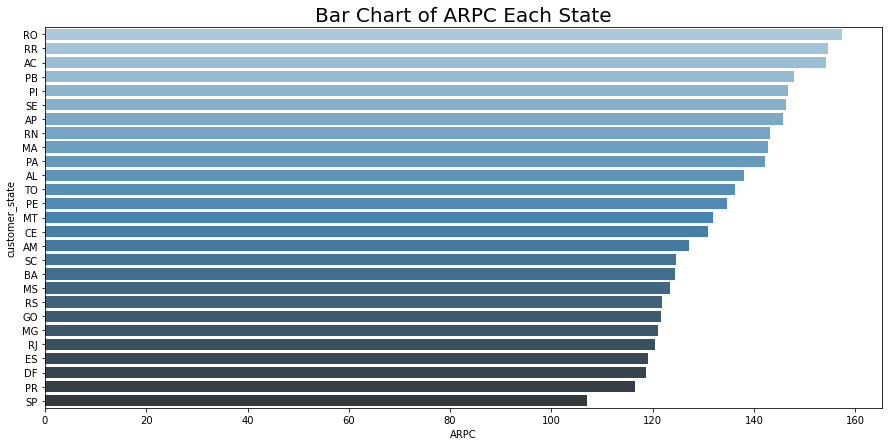

In [ ]:
# Create the Bar Chart
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(y='customer_state', x="ARPC", data=eda7_ok, orient='h', palette="Blues_d")
ax.set_title('Bar Chart of ARPC Each State', fontsize = 20)

**From the analysis we can conclude that :**

* State with lowest Average Revenue Per Customer is from São Paulo-SP (around 107).
* Top 10 States that have lowest Average Revenue Per Customer come from São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (PR), Distrito Federal (DF), Espírito Santo (ES), Mato Grosso do Sul (MS), Bahia (BA) and Goiás (GO). And most of the states are states that have most customer and contributes most sales.

# **Advanced Assignment**

In this project, a customer segmentation will be created by using RFM analysis and K-means clustering.

In [ ]:
# silhouette analysis
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
# Import Library
from sklearn import cluster
#from silhoutte import silhoutte_analysis
from sklearn.preprocessing import MinMaxScaler

## Data Preparation

In [ ]:
# Make a copy from the DataFrame
df_adv = df.copy()
df_adv

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,1,credit_card,3,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,montes claros,MG
103878,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
103880,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
103881,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,vinhedo,SP


In [ ]:
# Drop Unused Column
df_adv.drop(columns = ['payment_sequential',	'payment_type',	'payment_installments',	'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'customer_city'],inplace = True)
df_adv

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,RJ
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,SP
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,MG
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,SP
...,...,...,...,...,...,...,...
103877,fffbee3b5462987e66fb49b1c5411df2,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,MG
103878,fffc94f6ce00a00581880bf54a75a037,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,MA
103880,fffce4705a9662cd70adb13d4a31832d,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,SP
103881,fffe18544ffabc95dfada21779c9644f,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,SP


In [ ]:
# Checking order_status
df_adv['order_status'].value_counts()

delivered      92680
shipped         1043
canceled         579
unavailable      574
invoiced         275
processing       268
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# remove canceled and unavailable order_status
df_adv = df_adv[~df_adv['order_status'].isin(['canceled', 'unavailable'])]
df_adv['order_status'].value_counts()

delivered     92680
shipped        1043
invoiced        275
processing      268
created           5
approved          2
Name: order_status, dtype: int64

In [ ]:
df_adv['order_id'].nunique()

90301

In [ ]:
# Group by order_id
df_adv = pd.DataFrame(df_adv.groupby(['order_id',	'customer_id',	'order_status',	'order_purchase_timestamp',	'customer_unique_id',	'customer_state'])['payment_value'].agg('sum')).reset_index()
df_adv

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,SP,218.04
...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,SP,64.71


In [ ]:
# Rename order_purchase_timestamp becomes order_purchase_date
df_adv.rename(columns={'order_purchase_timestamp':'order_purchase_date'}, inplace = True)
df_adv

,order_id,customer_id,order_status,order_purchase_date,customer_unique_id,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,SP,218.04
...,...,...,...,...,...,...,...
90296,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,ecc3d4eb9b17d2f0865d21f2abecc51c,MG,139.88
90297,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,MA,343.40
90298,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,SP,116.85
90299,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,SP,64.71


### Create & Merge RFM table

**Create Recency Table from customer_unique_id and order_purchase_timestamp**

Recency shows time since last order from customer.

In [ ]:
# Find the last date purchase from each customer
df_r = df_adv.groupby('customer_unique_id').agg('max')['order_purchase_date']
df_r = pd.DataFrame(df_r)

In [ ]:
df_r

,order_purchase_date
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...
fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16


In [ ]:
# Find the last date of order purchase in the e-commerce
sincedate = df.agg('max')['order_purchase_timestamp']
sincedate

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


Timestamp('2018-10-17 17:30:18')

In [ ]:
# Find the recency of each customer
df_r['recency'] = (sincedate - df_r['order_purchase_date']).astype('timedelta64[D]')
df_r 

,order_purchase_date,recency
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336.0
...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41,293.0
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,310.0
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,617.0


In [ ]:
# Drop order_purchase_date and change recency data type
df_recency = df_r.copy()
df_recency.drop(columns = 'order_purchase_date',inplace = True)
df_recency['recency']=df_recency['recency'].astype(int)
df_recency=df_recency.reset_index()
df_recency

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163
2,0000f46a3911fa3c0805444483337064,585
3,0000f6ccb0745a6a4b88665a16c9f078,369
4,0004aac84e0df4da2b147fca70cf8255,336
...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293
87418,fffea47cd6d3cc0a88bd621562a9d061,310
87419,ffff371b4d645b6ecea244b27531430a,617
87420,ffff5962728ec6157033ef9805bacc48,168


In [ ]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87422 entries, 0 to 87421
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  87422 non-null  object
 1   recency             87422 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


**Create Frequency Table from customer_unique_id and order_id**

Frequency shows total number of transactions purchased by customer.

In [ ]:
# Find the total number of transactions purchased by each customer
df_f = df_adv.groupby('customer_unique_id').agg('count')['order_id']
df_f = pd.DataFrame(df_f)

In [ ]:
df_frequency = df_f.reset_index()
df_frequency

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,1
87418,fffea47cd6d3cc0a88bd621562a9d061,1
87419,ffff371b4d645b6ecea244b27531430a,1
87420,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
df_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87422 entries, 0 to 87421
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  87422 non-null  object
 1   order_id            87422 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


**Create Monetary Table from customer_unique_id and payment_value**

Monetary shows transaction value that customer spends in total.

In [ ]:
# Find the total transaction value for each customer
df_m = df_adv.groupby('customer_unique_id').agg('sum')['payment_value']
df_m = pd.DataFrame(df_m)

In [ ]:
df_monetary = df_m.reset_index()
df_monetary

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,84.58
87419,ffff371b4d645b6ecea244b27531430a,112.46
87420,ffff5962728ec6157033ef9805bacc48,133.69


**Merge RFM Table by joining recency, frequency, and monetary table**

In [ ]:
# Join all the tables
RFM_table = pd.merge(pd.merge(df_recency, df_frequency, how='inner'), df_monetary, how='inner')
# Rename the column name
RFM_table.rename(columns={'order_id':'frequency', 'payment_value':'monetary'},inplace = True)
RFM_table

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87419,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87420,ffff5962728ec6157033ef9805bacc48,168,1,133.69


In [ ]:
# Checking data type again
RFM_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87422 entries, 0 to 87421
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  87422 non-null  object 
 1   recency             87422 non-null  int64  
 2   frequency           87422 non-null  int64  
 3   monetary            87422 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB


## Data Preprocessing

In data preprocessing, I'd like to check the data distribution or if there's any outliers for each variables.

In [ ]:
# Call the DataFrame
RFM_table

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87419,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87420,ffff5962728ec6157033ef9805bacc48,168,1,133.69


In [ ]:
df_rfm_describe = RFM_table.describe()
df_rfm_describe

,recency,frequency,monetary
count,87422.000000,87422.000000,87422.000000
mean,287.069628,1.032932,119.031001
std,152.563095,0.207615,77.676764
min,44.000000,1.000000,9.590000
25%,164.000000,1.000000,60.000000
50%,268.000000,1.000000,99.650000
75%,396.000000,1.000000,159.850000
max,772.000000,16.000000,1122.720000


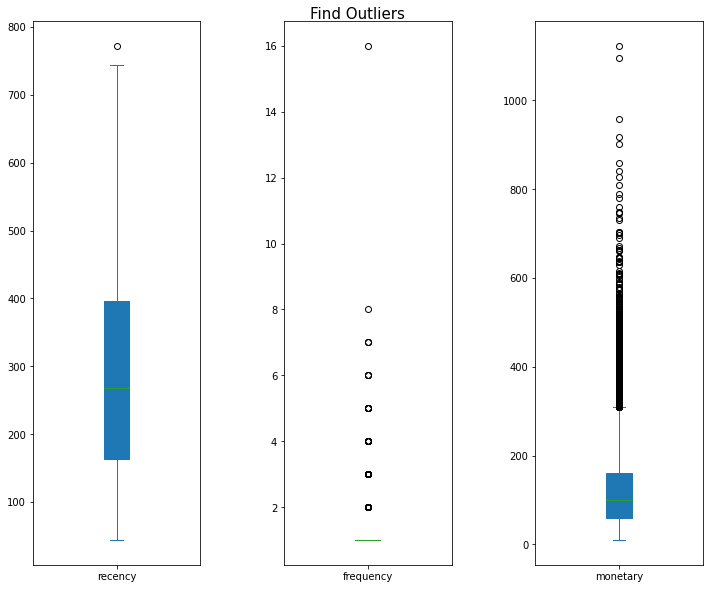

In [ ]:
#plot boxplot for each variables
# select columns to plot
plot_columns = RFM_table.columns.tolist()
# subplots
RFM_table.plot(subplots=True, layout=(1,3), kind='box', figsize=(12,10), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.subplots_adjust(wspace=0.5)

### Checking Outliers

**Check any outer outliers in recency columns.**

In [ ]:
# Define lower inner bound & upper inner bound for recency column
q1_value = RFM_table['recency'].quantile(.25)
q3_value = RFM_table['recency'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Inner Bound and Upper Inner Bound
LIB_value = q1_value - (1.5*iqr_value)
UIB_value = q3_value + (1.5*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LIB = ',LIB_value)
print('UIB = ',UIB_value)

Q1 =  164.0
Q3 =  396.0
IQR =  232.0
LIB =  -184.0
UIB =  744.0


In [ ]:
# check outliers for recency
RFM_table[(RFM_table['recency']<LIB_value)|(RFM_table['recency']>UIB_value)]

,customer_unique_id,recency,frequency,monetary
62864,b7d76e111c89f7ebf14761390f0f7d17,772,1,136.23


In [ ]:
# remove the outliers for recency
RFM_clean1 = RFM_table[(RFM_table['recency']>=LIB_value)&(RFM_table['recency']<=UIB_value)]
RFM_clean1

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87419,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87420,ffff5962728ec6157033ef9805bacc48,168,1,133.69


**Check any outer outliers in frequency columns.**

In [ ]:
# check outliers for frequency
RFM_clean1['frequency'].value_counts()

1     84828
2      2388
3       164
4        25
5         7
6         4
7         3
8         1
16        1
Name: frequency, dtype: int64

Most of customer's purchase frequency only once, so I decided remove the row with frequency > 7.

In [ ]:
# Remove rows with frequency > 7
RFM_clean2 = RFM_clean1[RFM_clean1['frequency']<=7]
RFM_clean2

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87419,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87420,ffff5962728ec6157033ef9805bacc48,168,1,133.69


**Check any outer outliers in monetary columns.**

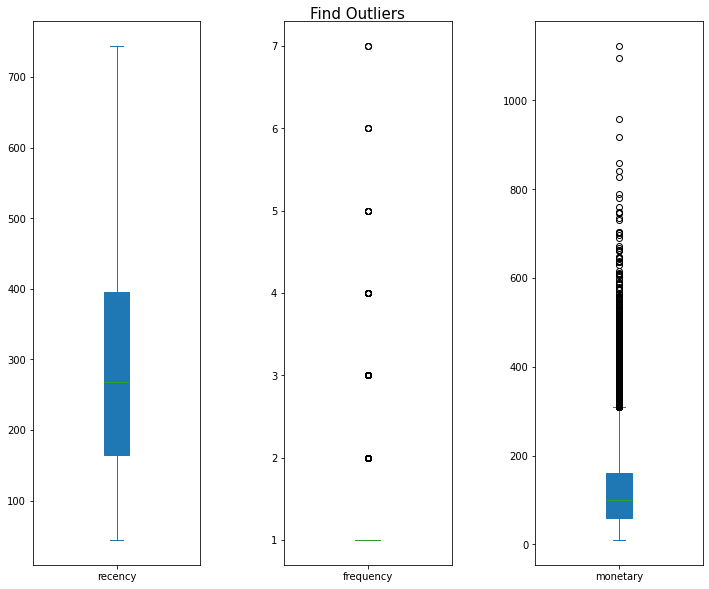

In [ ]:
#plot boxplot for each variables
# select columns to plot
plot_columns = RFM_clean2.columns.tolist()
# subplots
RFM_clean2.plot(subplots=True, layout=(1,3), kind='box', figsize=(12,10), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.subplots_adjust(wspace=0.5)

In [ ]:
# Define lower outer bound & upper outer bound for monetary
q1_value = RFM_clean2['monetary'].quantile(.25)
q3_value = RFM_clean2['monetary'].quantile(.75)
iqr_value = q3_value - q1_value

#Lower Outer Bound and Upper Outer Bound
LOB_value = q1_value - (3*iqr_value)
UOB_value = q3_value + (3*iqr_value)

print('Q1 = ',q1_value)
print('Q3 = ',q3_value)
print('IQR = ',iqr_value)
print('LOB = ',LOB_value)
print('UOB = ',UOB_value)

Q1 =  60.0
Q3 =  159.845
IQR =  99.845
LOB =  -239.53499999999997
UOB =  459.38


In [ ]:
# check outliers for monetary
RFM_clean2[(RFM_clean2['monetary']<LOB_value)|(RFM_table['monetary']>UOB_value)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,customer_unique_id,recency,frequency,monetary
403,012452d40dafae4df401bced74cdb490,156,2,495.33
677,01f2285f85a1c603eb7ef755ad311769,139,2,463.04
1096,032b3a42598667caf2e099999b9dc1b9,84,2,495.96
1220,038301b43811478e1a8dc0e476eaf52e,187,2,645.53
2088,0621c2a5979d3e887ae519620cbe2926,433,2,514.49
...,...,...,...,...
82806,f25c82f041560f45f4a408157ff3a5de,84,2,495.25
83119,f34cd7fd85a1f8baff886edf09567be3,388,3,749.31
84998,f8bc1d81f395f6239a2a5ab1b9edf1ab,58,3,515.10
85017,f8c74f26f568c1b52cd212e700e977df,189,2,496.30


In [ ]:
# remove outliers for monetary (percobaan pertama)
RFM_clean3 = RFM_clean2[(RFM_clean2['monetary']>=LOB_value)&(RFM_table['monetary']<=UOB_value)]
RFM_clean3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87417,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87418,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87419,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87420,ffff5962728ec6157033ef9805bacc48,168,1,133.69


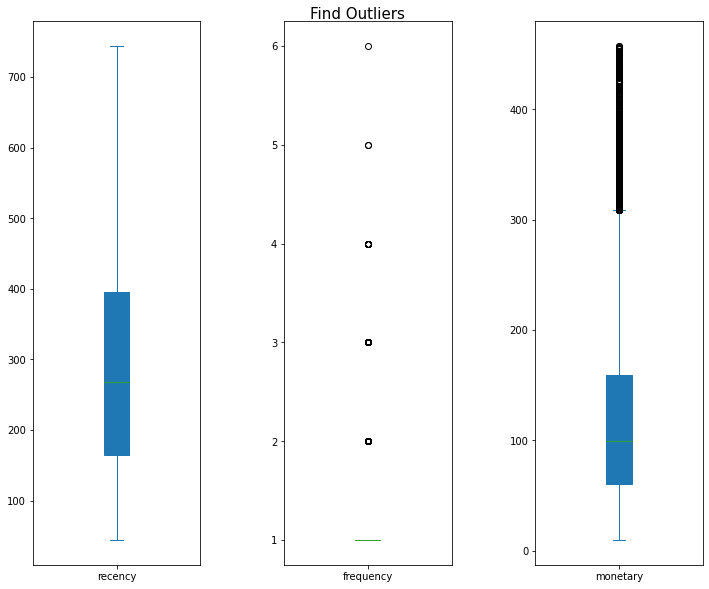

In [ ]:
#plot boxplot for each variables
# select columns to plot
plot_columns = RFM_clean3.columns.tolist()
# subplots
RFM_clean3.plot(subplots=True, layout=(1,3), kind='box', figsize=(12,10), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.subplots_adjust(wspace=0.5)

In [ ]:
print('Before removing outliers, there are {} rows data.' .format(len(RFM_table)))
print('After removing outliers, there are {} rows data.' .format(len(RFM_clean3)))

Before removing outliers, there are 87422 rows data.
After removing outliers, there are 87257 rows data.


In [ ]:
RFM_clean3 = RFM_clean3.set_index('customer_unique_id')
RFM_clean3

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,585,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
ffff371b4d645b6ecea244b27531430a,617,1,112.46


In [ ]:
RFM_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87257 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    87257 non-null  int64  
 1   frequency  87257 non-null  int64  
 2   monetary   87257 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.7+ MB


### Scaling The Number
Each of numeric columns have different scale, so we need to scale it by using MinMaxScaler method.

In [ ]:
# Call DataFrame 
RFM_scale = RFM_clean3.copy()
RFM_scale

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,585,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
ffff371b4d645b6ecea244b27531430a,617,1,112.46


In [ ]:
numerical_column = ['recency', 'frequency',	'monetary']

In [ ]:
# Scale DataFrame by using MinMaxScaler
scaler = MinMaxScaler()
RFM_scale[numerical_column] = scaler.fit_transform(RFM_scale[numerical_column])
RFM_scale

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.165714,0.0,0.295361
0000b849f77a49e4a4ce2b2a4ca5be3f,0.170000,0.0,0.039289
0000f46a3911fa3c0805444483337064,0.772857,0.0,0.171064
0000f6ccb0745a6a4b88665a16c9f078,0.464286,0.0,0.075967
0004aac84e0df4da2b147fca70cf8255,0.417143,0.0,0.418118
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,0.355714,0.0,0.352107
fffea47cd6d3cc0a88bd621562a9d061,0.380000,0.0,0.167403
ffff371b4d645b6ecea244b27531430a,0.818571,0.0,0.229641


## Cluster Analysis

### Determining Number of Cluster
In this project, I will be using two methods for determine the number of cluster :
* Elbow Method
* Silhouette Coefficient

**Elbow Method**

<Figure size 1800x720 with 0 Axes>

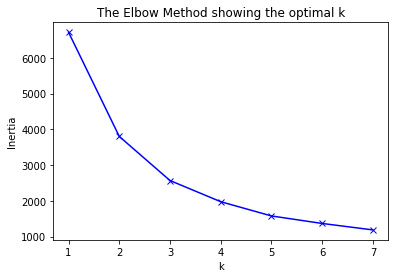

In [ ]:
# Create Elbow Plot for Determining Number of Cluster

distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(RFM_scale)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(25,10))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph above, it is clear that number of k = 2 or 3 will be the optimal for number of cluster. But for more accurate analysis, Silhouette Analysis will be performed.

**Silhouette Analysis**

For n_clusters = 2 The average silhouette_score is : 0.3967991279610512
For n_clusters = 3 The average silhouette_score is : 0.404201834304504
For n_clusters = 4 The average silhouette_score is : 0.36158892503002943
For n_clusters = 5 The average silhouette_score is : 0.3733258747477178


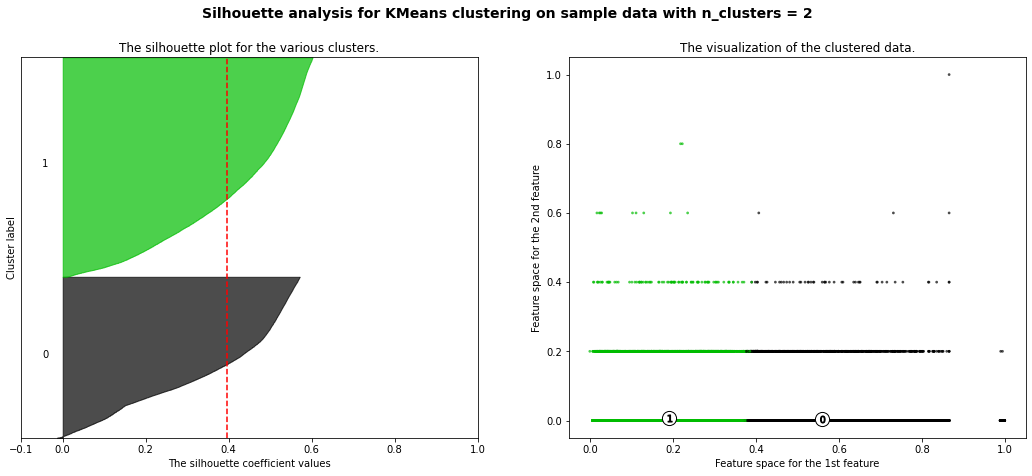

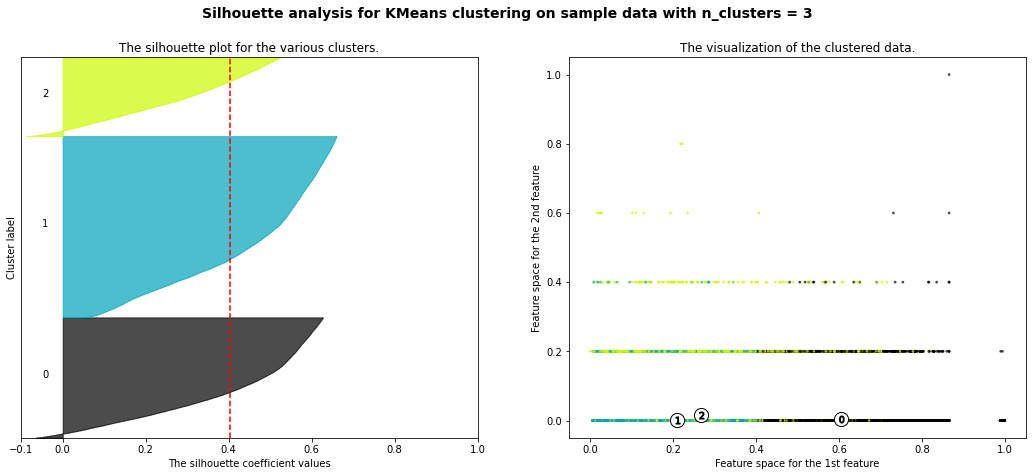

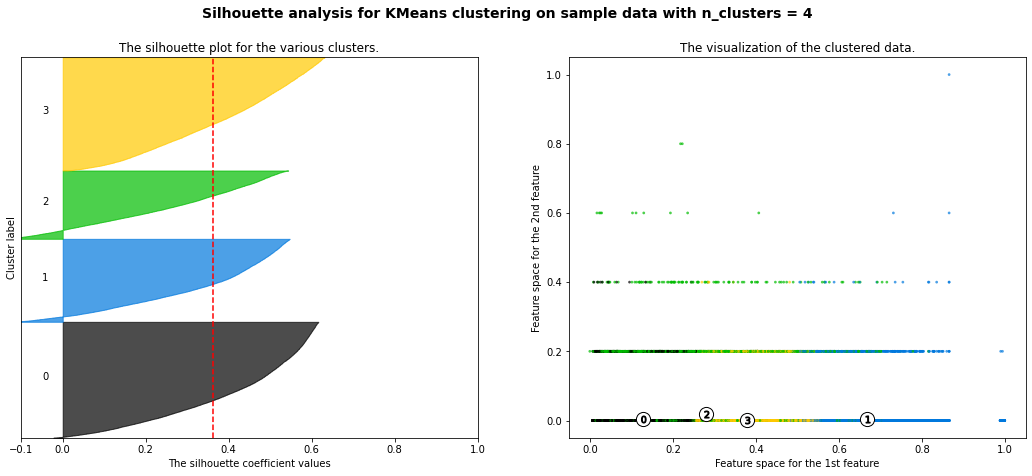

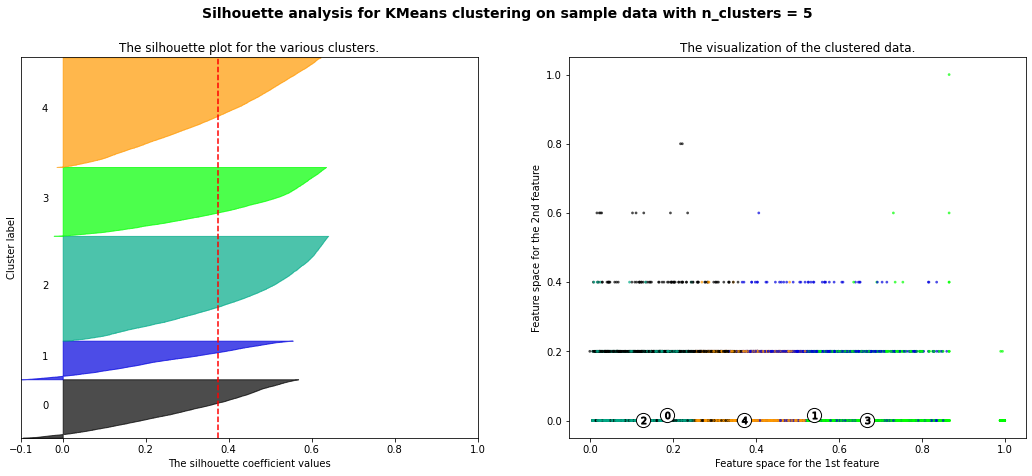

In [ ]:
# Perform silhouette analysis for determine the number of cluster
silhoutte_analysis(RFM_scale,[2,3,4,5])

Based on Silhouette Score and Silhouette plot, k = 3 will be chosen as  number of cluster.

### Fit Data Into Model

In [ ]:
RFM_fitmodel = RFM_scale.copy()
RFM_fitmodel

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.165714,0.0,0.295361
0000b849f77a49e4a4ce2b2a4ca5be3f,0.170000,0.0,0.039289
0000f46a3911fa3c0805444483337064,0.772857,0.0,0.171064
0000f6ccb0745a6a4b88665a16c9f078,0.464286,0.0,0.075967
0004aac84e0df4da2b147fca70cf8255,0.417143,0.0,0.418118
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,0.355714,0.0,0.352107
fffea47cd6d3cc0a88bd621562a9d061,0.380000,0.0,0.167403
ffff371b4d645b6ecea244b27531430a,0.818571,0.0,0.229641


In [ ]:
cluster_model = cluster.KMeans(n_clusters=3,random_state=2)
cluster_model.fit(RFM_fitmodel)
cluster_label = cluster_model.labels_
RFM_fitmodel['cluster'] = cluster_label
RFM_fitmodel

,recency,frequency,monetary,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.165714,0.0,0.295361,1
0000b849f77a49e4a4ce2b2a4ca5be3f,0.170000,0.0,0.039289,1
0000f46a3911fa3c0805444483337064,0.772857,0.0,0.171064,2
0000f6ccb0745a6a4b88665a16c9f078,0.464286,0.0,0.075967,2
0004aac84e0df4da2b147fca70cf8255,0.417143,0.0,0.418118,0
...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,0.355714,0.0,0.352107,0
fffea47cd6d3cc0a88bd621562a9d061,0.380000,0.0,0.167403,1
ffff371b4d645b6ecea244b27531430a,0.818571,0.0,0.229641,2


In [ ]:
RFM_fitmodel = RFM_fitmodel.reset_index()
RFM_fitmodel.drop(columns=['recency','frequency','monetary'],inplace =True)
RFM_fitmodel

,customer_unique_id,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,2
3,0000f6ccb0745a6a4b88665a16c9f078,2
4,0004aac84e0df4da2b147fca70cf8255,0
...,...,...
87252,fffbf87b7a1a6fa8b03f081c5f51a201,0
87253,fffea47cd6d3cc0a88bd621562a9d061,1
87254,ffff371b4d645b6ecea244b27531430a,2
87255,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
RFM_final = pd.merge(RFM_clean3.reset_index(), RFM_fitmodel, how='inner')
RFM_final

,customer_unique_id,recency,frequency,monetary,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1
2,0000f46a3911fa3c0805444483337064,585,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,0
...,...,...,...,...,...
87252,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,0
87253,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,1
87254,ffff371b4d645b6ecea244b27531430a,617,1,112.46,2
87255,ffff5962728ec6157033ef9805bacc48,168,1,133.69,1


## Interpreting Results

In [ ]:
# Call the DataFrame again
RFM_final.head()

,customer_unique_id,recency,frequency,monetary,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1
2,0000f46a3911fa3c0805444483337064,585,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,0


In [ ]:
# Interpreting Recency (time since last day purchase)
RFM_final.groupby(['cluster'])['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18025.0,234.694591,104.137087,44.0,156.0,232.0,314.0,615.0
1,41703.0,190.403568,82.566276,49.0,119.0,190.0,259.0,343.0
2,27529.0,468.119002,87.369095,320.0,396.0,460.0,532.0,744.0


**Recency shows time since last order from customer.**

By considering mean and median of recency, we can conclude that :

Cluster 0 is customer's cluster with moderate recent buyers who has purchase around 7-8 months ago in general since last date of order_purchase_timestamp of this dataset, i.e October 17th 2018.

Cluster 1 is customer's cluster with most recent buyers who has purchased around 6 months ago in general since last date of order_purchase_timestamp of this dataset, i.e October 17th 2018.

Cluster 2  is customer's cluster with biggest recency, which means their last purchase date more than 1 year ago in general since last date of order_purchase_timestamp of this dataset, i.e October 17th 2018.

In [ ]:
# Interpreting Frequency (number of transactions purchased by customer)
RFM_final.groupby(['cluster'])['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18025.0,1.085936,0.306742,1.0,1.0,1.0,1.0,5.0
1,41703.0,1.012517,0.113948,1.0,1.0,1.0,1.0,3.0
2,27529.0,1.018962,0.145416,1.0,1.0,1.0,1.0,6.0


**Frequency shows total number of transactions purchased by customer.**

By considering mean and median of frequency, we can conclude that :

Cluster 0, 1, 2 have mean and median around 1, which means their number of transasctions on this e-commerce only one times, so it is clear that most of our customers are one-time buyers.

In [ ]:
# Interpreting Monetary (amount of money that customer spends in total)
RFM_final.groupby(['cluster'])['monetary'].agg(['count','mean','std','median','sum','min','max'])

,count,mean,std,median,sum,min,max
cluster,,,,,,,
0,18025,228.022478,57.616154,214.13,4110105.16,138.16,457.55
1,41703,80.930355,37.119192,75.25,3375038.60,9.59,173.70
2,27529,102.708697,58.071210,90.28,2827467.73,10.07,350.97


**Monetary shows transaction value that customer spends in total.**

By considering mean and median of monetary, we can conclude that :

Cluster 0 is customer's cluster with highest spending amount of money (around 210~230) in general. 

Cluster 1 is customer's cluster with lowest spending amount of money (around 70~80) in general.

Cluster 2 is customer's cluster with moderate spending amount of money (around 90~100) in general.

### Naming The Clusters

**Describing Clusters' Behaviour**

After doing RFM analysis and K-means clustering for customer segmentation in this e-commerce, we can divide our customers into three clusters :

Cluster 0 (***Loyalist Squarepants!***)

Around 20.66% of our customers has highest spending amount of money, but they only come one time and haven't been back for a quite long time.
****************************
Cluster 1 (***Minions on Shopping :D***)

Around 47.79% of our customers who has lowest spending amount of money, they also come only one time but they recently come (most recent purchaser).
****************************
Cluster 2 (***Sleeping Snorlax ~***)

Around 31.55% of our customers who has moderate spending amount of money, they also come only one time and haven't been back for really long time.

## Additional Analysis

This additional analysis is conducted for learning purpose and will be using RFM analysis with Quartile Method.

Since most of our customers are one-time purchasers, so I decided to do RFM Analysis with Quartile Method for Recency and Monetary variables. For Frequency variable, I will divide them into two groups, the one-time purchasers and more than one-time purchasers.

In [ ]:
# Call the dataset again
RFM_quartile = RFM_clean3.copy()
RFM_quartile = RFM_quartile.reset_index()
RFM_quartile

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
87252,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
87253,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
87254,ffff371b4d645b6ecea244b27531430a,617,1,112.46
87255,ffff5962728ec6157033ef9805bacc48,168,1,133.69


RFM analysis involves categorising three variables, Recency, Frequency, Monetary into 3 or more categories. For this analysis, four categories will be created based on quartiles.

In [ ]:
quartiles = RFM_quartile.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary
0.25    164.0        1.0     60.00
0.50    268.0        1.0     99.43
0.75    396.0        1.0    159.39 <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Convert the quartile numbers into dictionary
quartile = quartiles.to_dict()
quartile

{'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 60.0, 0.5: 99.43, 0.75: 159.39},
 'recency': {0.25: 164.0, 0.5: 268.0, 0.75: 396.0}}

The categories will be 1,2,3,4 for Recency and Monetary.  Number 1 will be the best score and number 4 will be the worst score. 

In [ ]:
# for Recency, the category need to be reversed
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# for Frequency and Monetary
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1   

In [ ]:
RFM_segment = RFM_quartile.copy()
RFM_segment['R_class'] = RFM_segment['recency'].apply(RClass, args=('recency',quartile,))
RFM_segment['F_class'] = RFM_segment['frequency'].apply(FMClass, args=('frequency',quartile,))
RFM_segment['M_class'] = RFM_segment['monetary'].apply(FMClass, args=('monetary',quartile,))
# Combine the score into single score
RFM_segment['RFM_class'] = RFM_segment['R_class'].astype(str) + RFM_segment['F_class'].astype(str) + RFM_segment['M_class'].astype(str)
RFM_segment

,customer_unique_id,recency,frequency,monetary,R_class,F_class,M_class,RFM_class
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,4,2,142
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,4,4,144
2,0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3,443
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,4,4,344
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,4,1,341
...,...,...,...,...,...,...,...,...
87252,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,3,4,1,341
87253,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,4,3,343
87254,ffff371b4d645b6ecea244b27531430a,617,1,112.46,4,4,2,442
87255,ffff5962728ec6157033ef9805bacc48,168,1,133.69,2,4,2,242


In [ ]:
RFM_segment['RFM_class'].unique()

array(['142', '144', '443', '344', '341', '241', '244', '442', '242',
       '444', '342', '243', '441', '143', '141', '343', '311', '112',
       '412', '211', '111', '411', '213', '312', '313', '114', '413',
       '113', '212', '214', '314', '414'], dtype=object)

In [ ]:
# recency from each clusters
RFM_class_r = pd.DataFrame(RFM_segment.groupby('RFM_class')['recency'].agg('mean')).reset_index()

In [ ]:
# frequency from each clusters
RFM_class_f = pd.DataFrame(RFM_segment.groupby('RFM_class')['frequency'].agg('mean')).reset_index()

In [ ]:
# monetary from each clusters
RFM_class_m = pd.DataFrame(RFM_segment.groupby('RFM_class')['monetary'].agg('median')).reset_index()

In [ ]:
RFM_class = pd.merge(pd.merge(RFM_class_r,RFM_class_f),RFM_class_m)
RFM_class

,RFM_class,recency,frequency,monetary
0,111,107.595023,2.095023,255.785
1,112,105.140127,2.038217,134.060
2,113,112.311475,2.016393,82.100
3,114,96.818182,2.000000,52.130
4,141,107.635530,1.000000,208.105
5,142,108.216361,1.000000,125.970
6,143,104.880685,1.000000,78.190
7,144,105.653285,1.000000,42.770
8,211,220.860731,2.100457,246.485
9,212,216.239130,2.043478,131.915


**Since there are too many clusters, I decided to "sum up" the RFM_class numbers and generate insights from there.**

In [ ]:
RFM_cluster = RFM_segment.copy()
RFM_cluster['RFM_class'] = RFM_cluster['R_class'] + RFM_cluster['F_class'] + RFM_cluster['M_class']
RFM_cluster

,customer_unique_id,recency,frequency,monetary,R_class,F_class,M_class,RFM_class
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,4,2,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,4,4,9
2,0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3,11
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,4,4,11
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,4,1,8
...,...,...,...,...,...,...,...,...
87252,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,3,4,1,8
87253,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,4,3,10
87254,ffff371b4d645b6ecea244b27531430a,617,1,112.46,4,4,2,10
87255,ffff5962728ec6157033ef9805bacc48,168,1,133.69,2,4,2,8


In [ ]:
# recency from each clusters
RFM_cluster_r = pd.DataFrame(RFM_cluster.groupby('RFM_class')['recency'].agg('mean')).reset_index()

In [ ]:
# frequency from each clusters
RFM_cluster_f = pd.DataFrame(RFM_cluster.groupby('RFM_class')['frequency'].agg('mean')).reset_index()

In [ ]:
# monetary from each clusters
RFM_cluster_m = pd.DataFrame(RFM_cluster.groupby('RFM_class')['monetary'].agg('mean')).reset_index()

In [ ]:
# number of customers from each clusters
RFM_cluster_c = pd.DataFrame(RFM_cluster.groupby('RFM_class')['customer_unique_id'].agg('count')).reset_index()

In [ ]:
RFM_clusterok = pd.merge(pd.merge(pd.merge(RFM_cluster_r,RFM_cluster_f),RFM_cluster_m),RFM_cluster_c)
RFM_clusterok

,RFM_class,recency,frequency,monetary,customer_unique_id
0,3,107.595023,2.095023,270.476131,442
1,4,190.326050,2.084034,229.868303,595
2,5,277.082312,2.052539,219.616095,571
3,6,135.957657,1.099506,219.469361,5668
4,7,166.136918,1.019638,172.239812,10897
5,8,215.657409,1.004618,141.773486,15590
6,9,280.392562,1.000628,114.490411,20705
7,10,347.455946,1.000000,81.839432,16298
8,11,413.796835,1.000000,60.505347,10932
9,12,504.319122,1.000000,42.094425,5559


### Naming The Clusters

After doing RFM analysis by using Quartile Method for customer segmentation in this e-commerce, we can divide our customers into these classes :


Class 3, 4, 5 (***Sophaholic Squarepants!***)

Around 1.8% of our customers (1,608 customers) are big spenders who just come to our e-commerce (recency less than one year) and have come more than one time.
*********************************************

Cluster 6 (***Patrick Doesn't Care!***)

Around 6.5% of our customers (5,668 customers) are also big spenders who just come to our e-commerce, but this is their first purchase in our e-commerce.
*********************************************

Cluster 7, 8, 9 (***Minions on Shopping :D***)

Around 54.1% of our customers (47,192 customers) are moderate spenders who just come to our e-commerce (recency less than one year), but this is also their first purchase in our e-commerce.
*********************************************

Cluster 10, 11, 12 (***Sleeping Snorlax ~***)

Around 37.6% of our customers (32,789 customers) are spending the lowest amount of money (less than 100), they come only one time and haven't been back for really long time (more than one year).

## Business Recommendations

1. Since most of our customers are newcomers who recently made purchases, giving welcome discount with small rate or amount will make them feel welcome to our e-commerce. Build a promote referrals/review program is also recommended, so we can turn them into our advocates while acquiring new customers and gain positive image to our customers.


2. For our high spender customers, we can give special new product introductions based on their purchase product history.  We can also try add cross/up-sells strategy such as bundling in order to increase their AOV since they are the smallest part of the population compared to the others. Sending special voucher on special day will make them feel special too!

3. For our customers who haven't been back for really long time, we can try bring them back with Reactivation campaign or promotions (not too often), and run e-mail surveys to find out the reasons why customers didn’t come back, so we can improve our system or services in order to prevent the newcomers and high-spender customers become churn. If possible, we can try giving discounts, but again we need to consider our marketing budget.


4. Build a loyalty-membership programs for overall customers where customers get certain points for every purchase they make that can be encashed during the next purchase. This will increase their willingness to come back and purchase again. Also create a VIP programs with exclusive offers specifically for high-contribute customers. High-contribute customers can be someone who spends high but not too often come or someone who often come but spend not too much money. This will encourage new customers to shop more and join the group.

